# Имена и значения
Когда вы программируете, у вас всё время появляются новые *значения*, которые хранятся в *объектах*.
Объекты бывают *изменяемые* и *неизменяемые*. Значение неизменяемого объекта задаётся в момент его создания. Получается, *чтобы создать объект, нужно его вычислить.*

In [ ]:
2 + 3

5

Уничтожением объектов занимается автоматический *сборщик мусора* (garbage collector). В данном случае объект 5 был создан оператором сложения, а затем, за неимением в нём нужды, выброшен. Чтобы запомнить что-то, нужно *назвать* это что-то.

Имена в Python не имеют типа, тип закреплён за объектом, а не за именем. Связывание называется *оператором присваивания* и действует справа-налево:

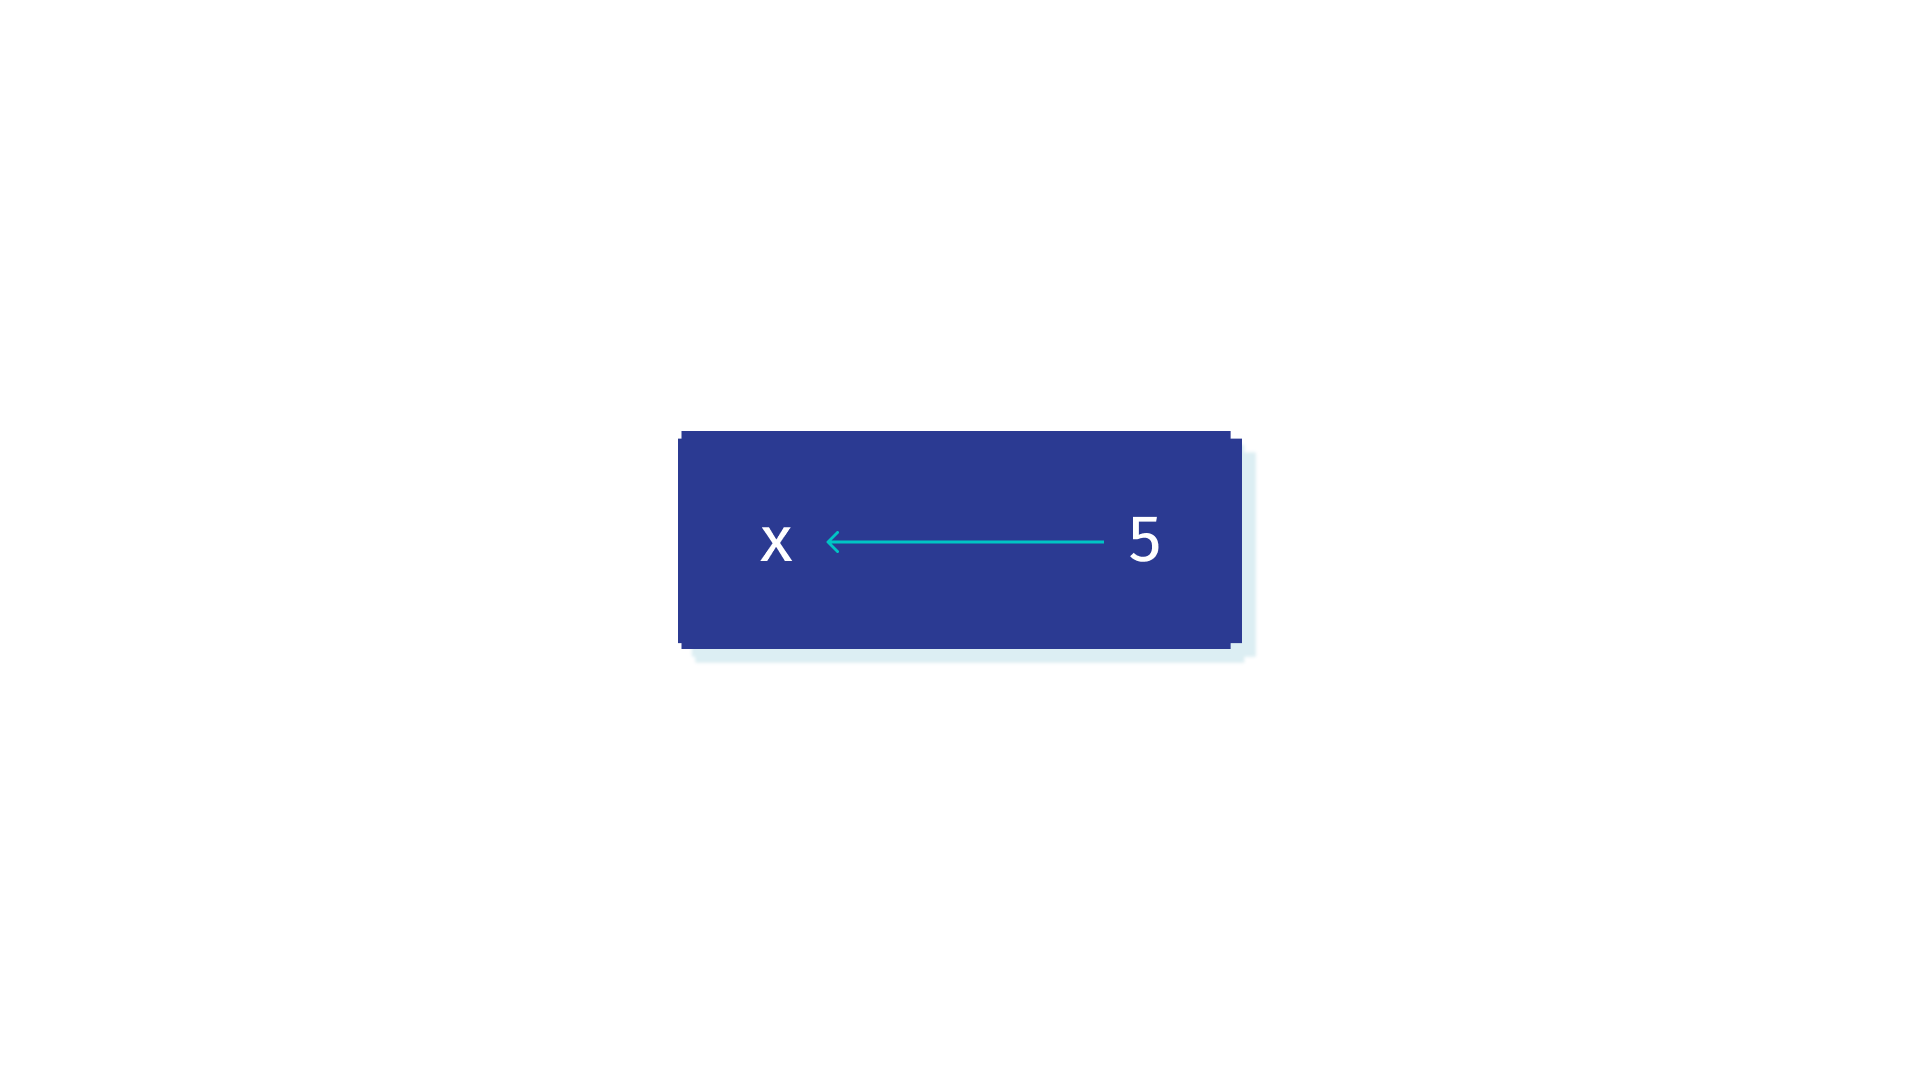

In [ ]:
x = 2 + 3

In [ ]:
print(x)

5


Все создаваемые имена попадают в текущее *пространство имён*.

## Функции
Имя может быть не только у "мёртвого" объекта, но и у алгоритма. Такие алгоритмы в Python называются *функциями*. Создание функции по действию похоже на оператор присваивания, но выглядит совсем иначе:

In [ ]:
def algorithm(x):
    return x*2

print(algorithm)

<function algorithm at 0x7f3e5ca40e60>


Будучи алгоритмом, функция предназначена не для распечатки через `print`, а для исполнения.
Она чем-то похожа на "мясорубку", которая может быть запущена для различных значений параметра, и для каждого из них возвращает какое-то значение:
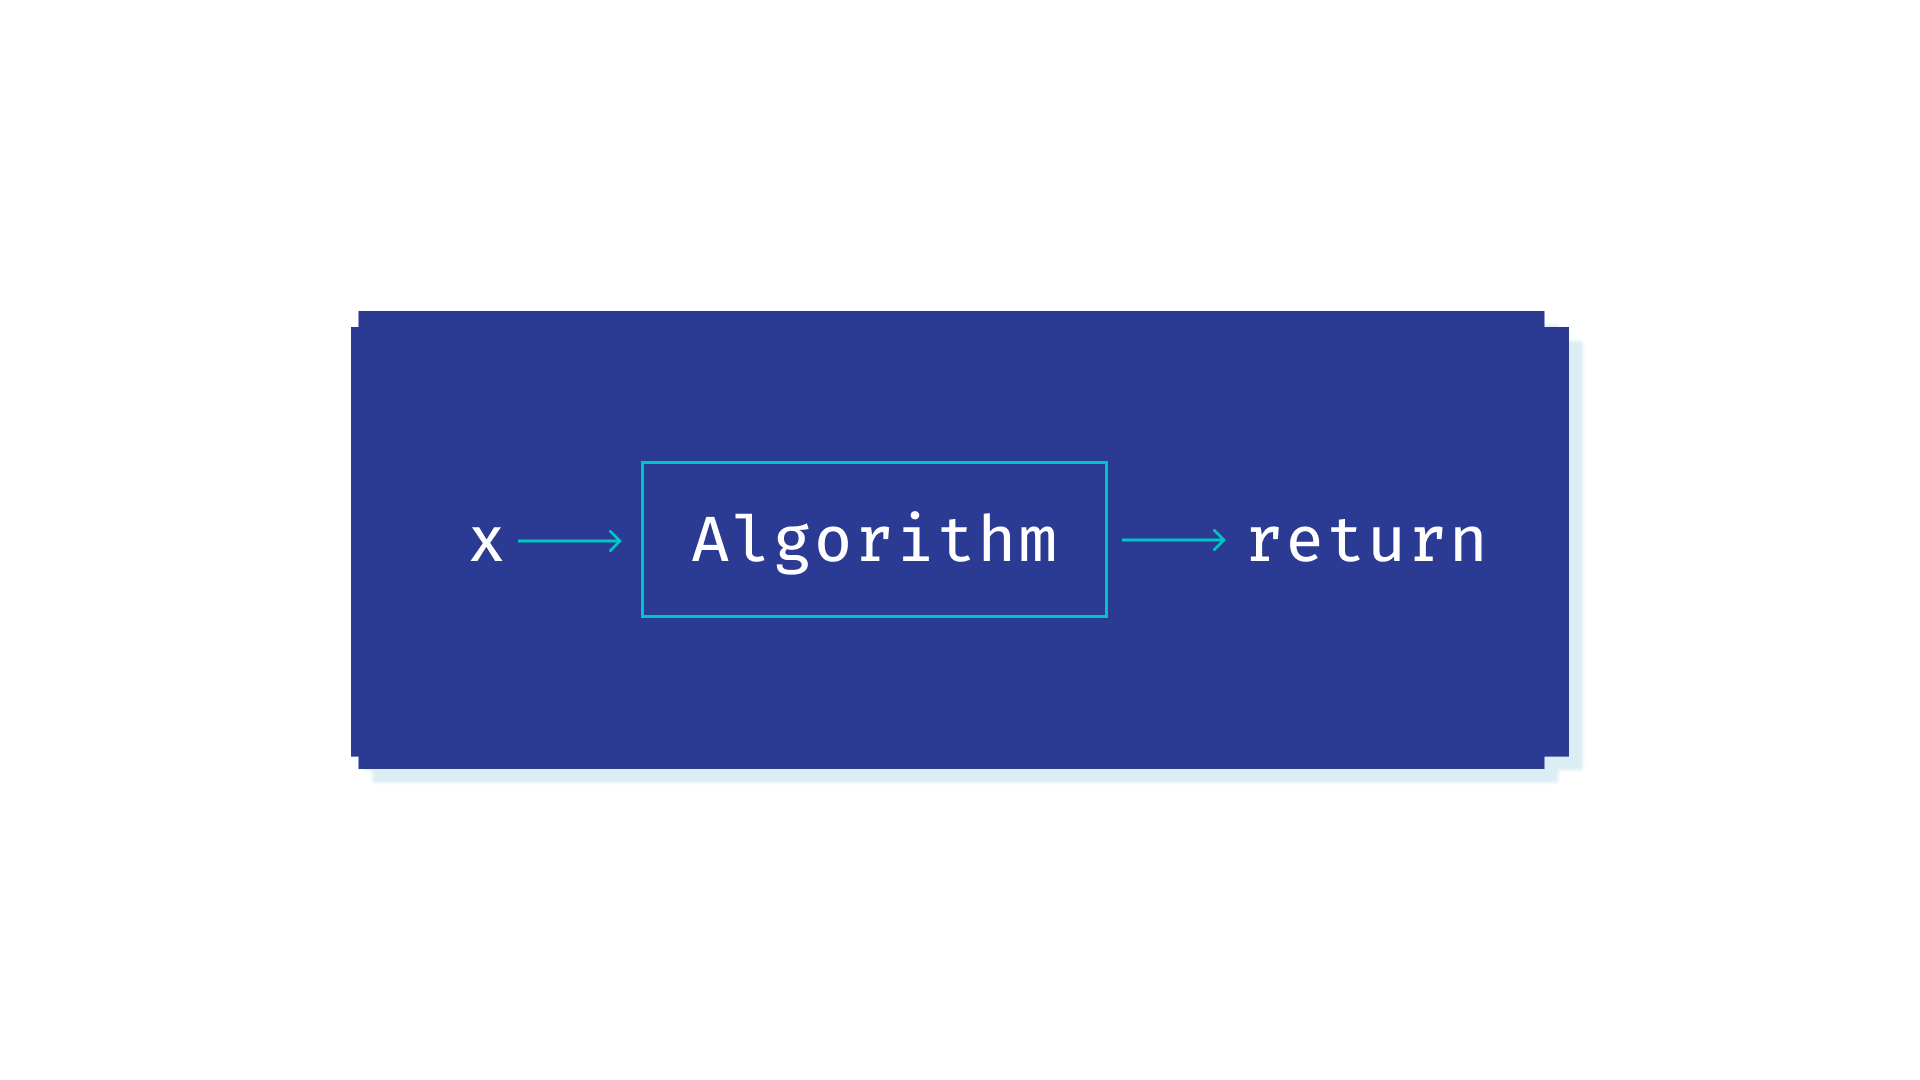

In [ ]:
algorithm(10)

20

Итак, функция **вызывается** — запускается на исполнение — *при помощи круглых скобок*. При этом *фактическое значение параметра* указывается в скобках в момент вызова функции. Результат работы алгоритма возвращается словом `return`, и может быть присвоен какому-то имени или же сразу отправлен куда-то дальше, например, на печать.

In [ ]:
x = 10
y = algorithm(x)
print(x, y)

10 20


Имя функции связывается с *объектом функции* так же, как имя переменной связывается с объектом её значения.
(На этой картинке стрелки отображают не направление присваивания, а возникающую связь между именами и объектами)
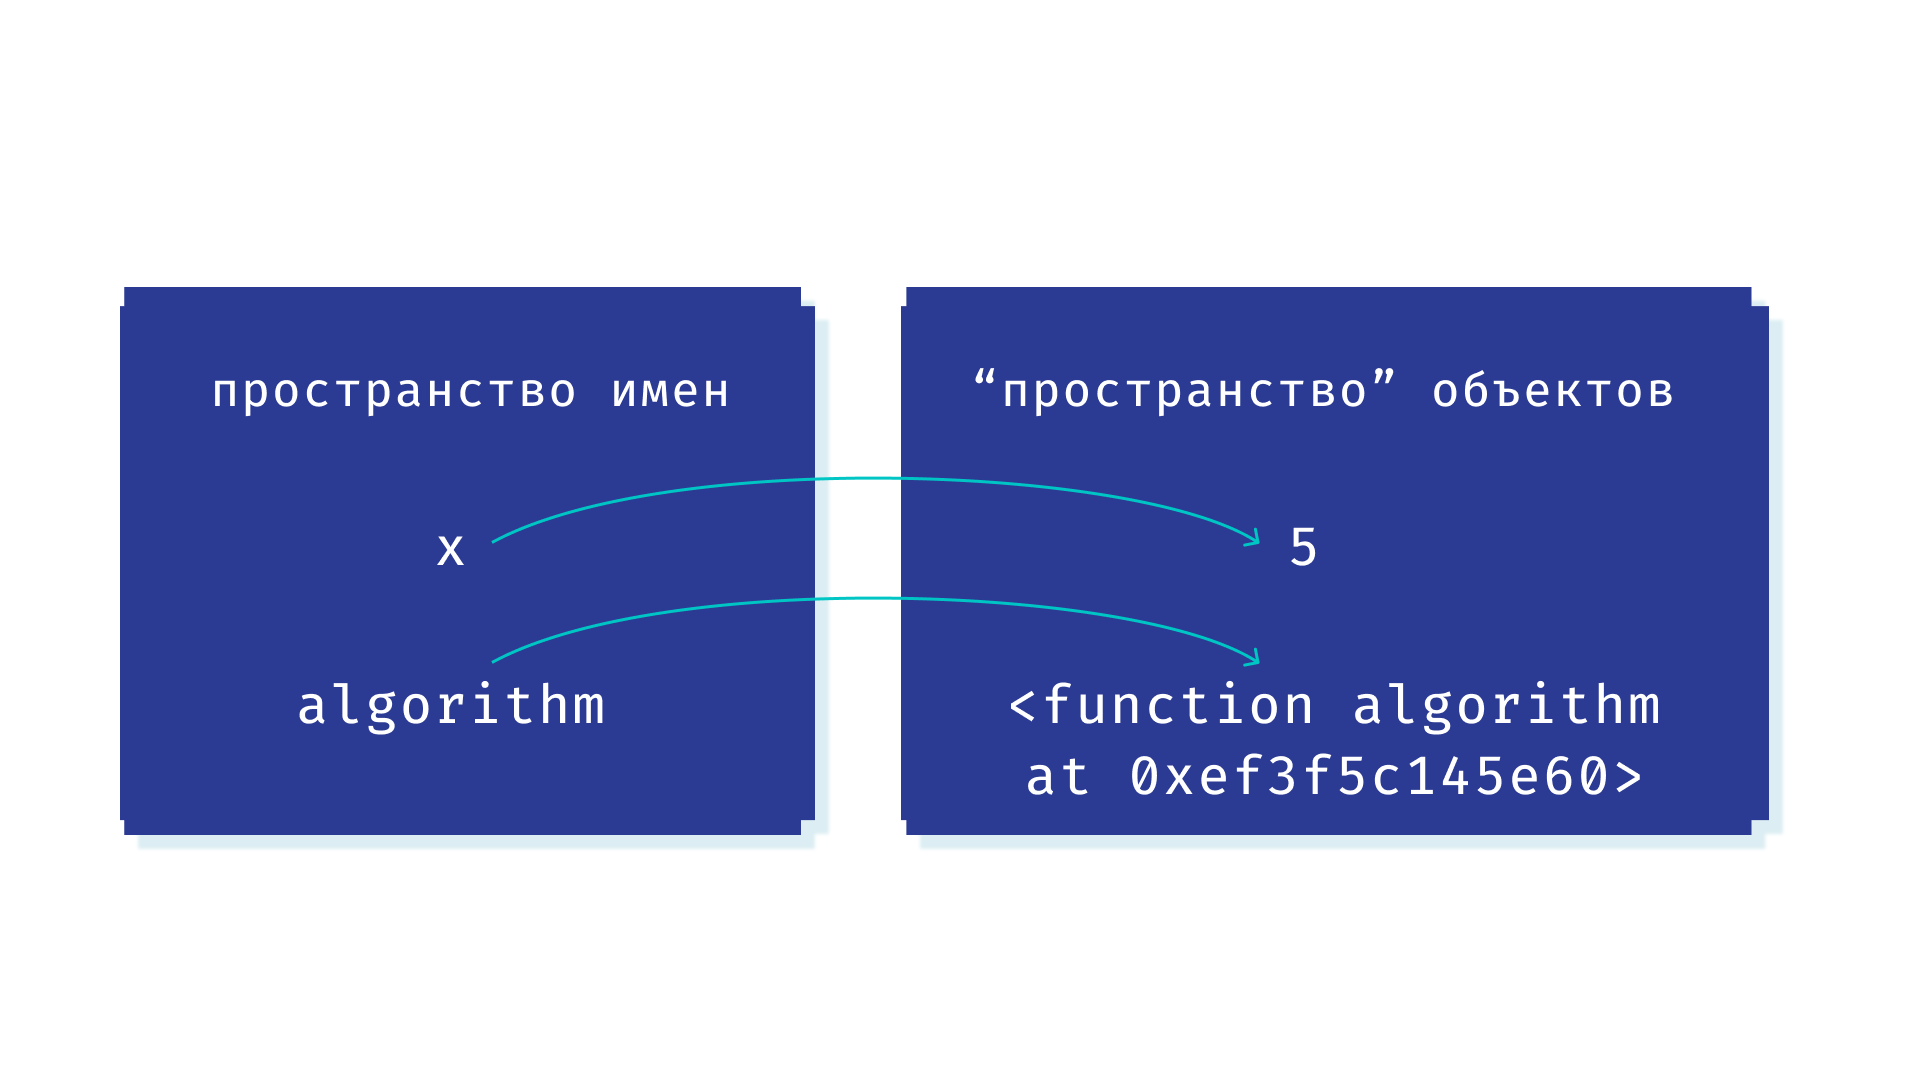

## Множественное присваивание

Если один и тот же объект (вместе со своим значением) должен быть назван несколькими именами, можно использовать "*трамвайное*" множественное присваивание:

In [ ]:
x = y = z = 0
print(x, y, z)

0 0 0


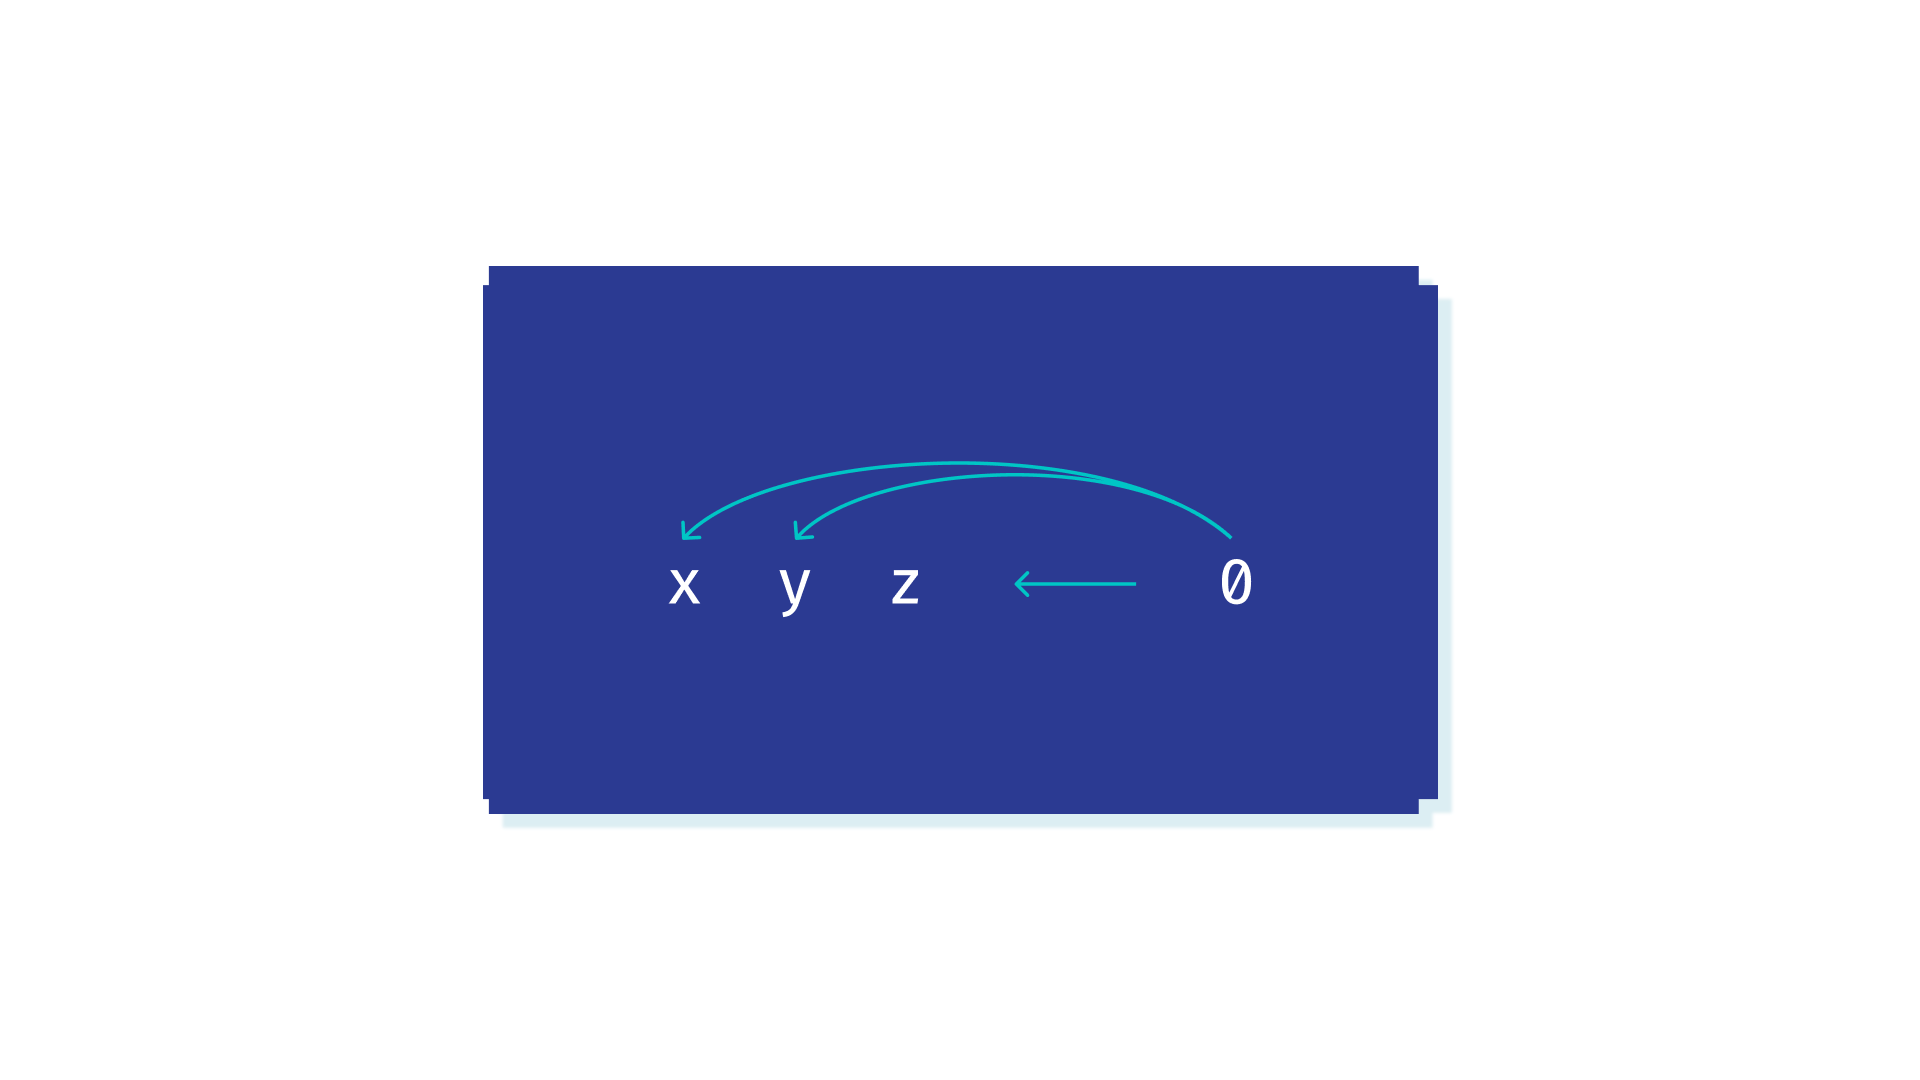

Интереснее выглядит множественное присваивание в *кортеж имён*:

In [ ]:
x, y, z = 1, 2, 3
print(x, y, z)

1 2 3


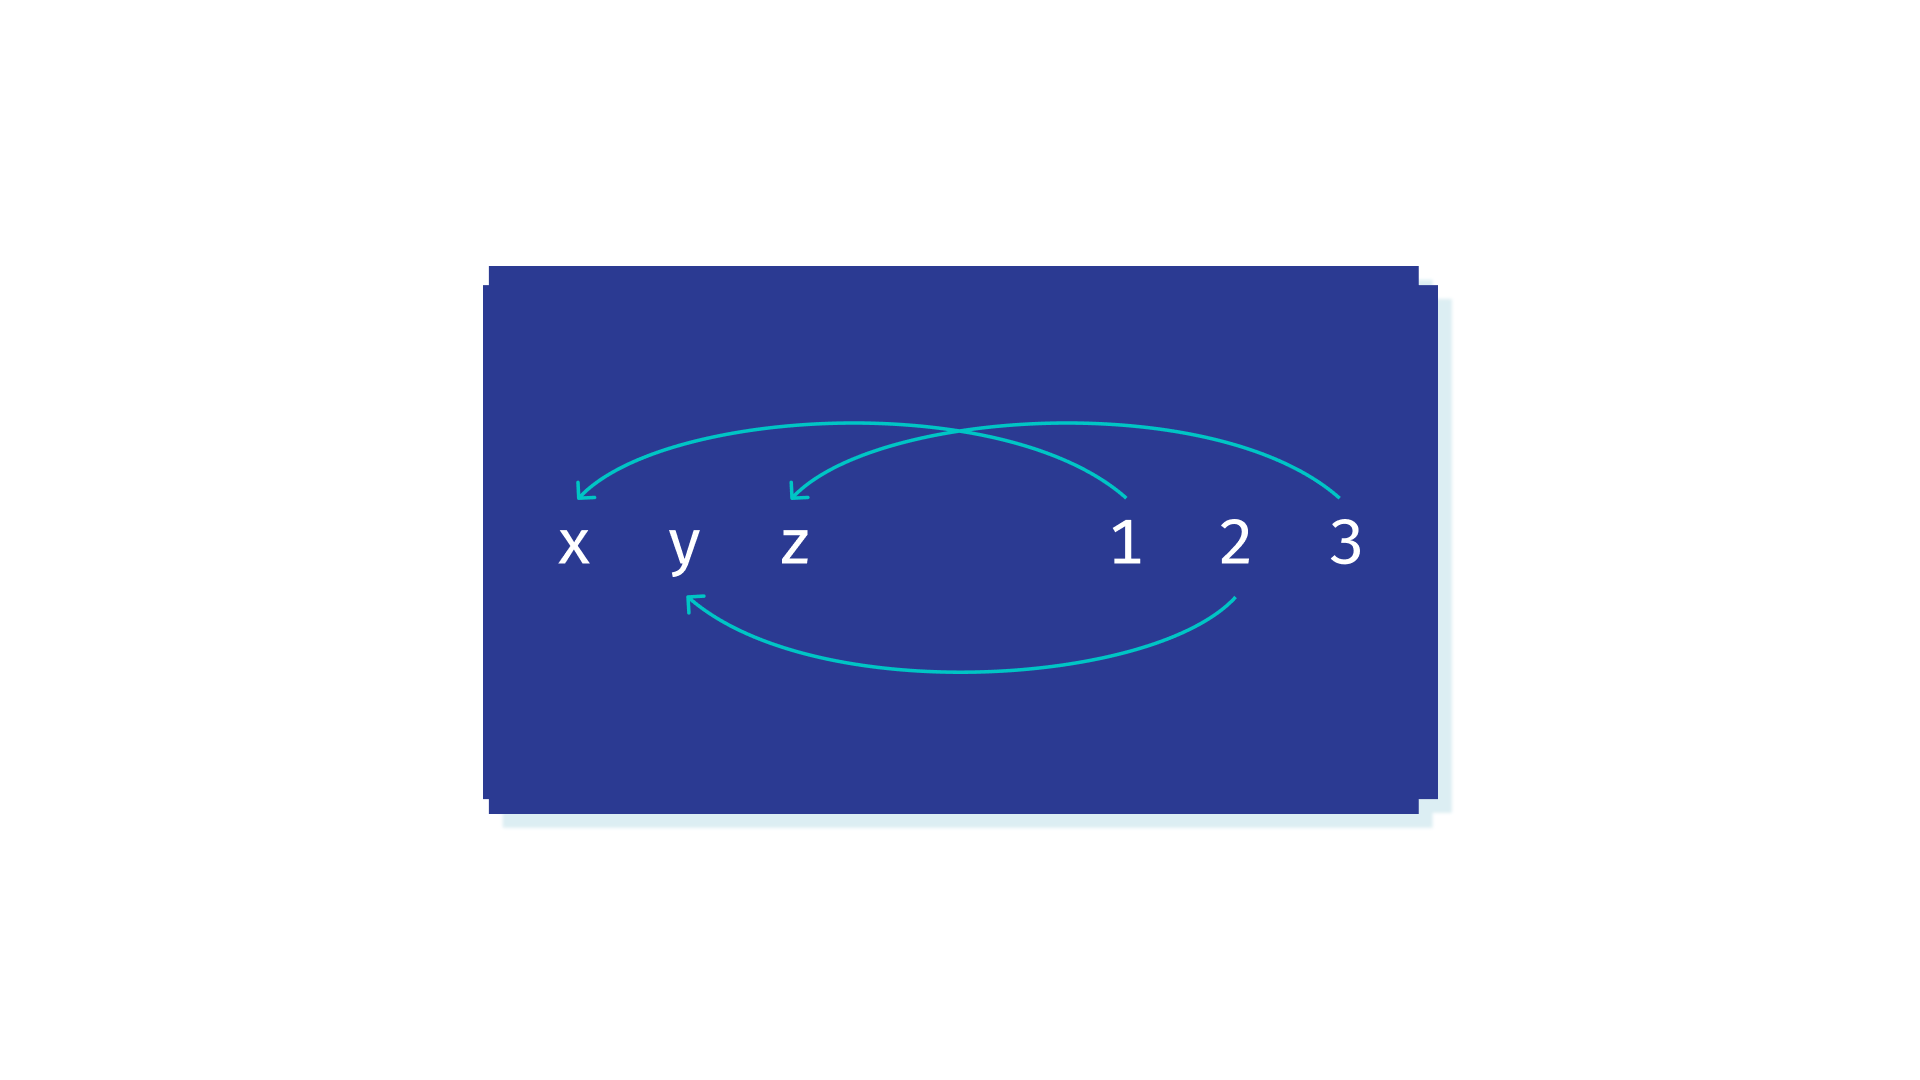

*Кортеж* может быть не только у имён, но и у значений. В данном случае 1, 2, 3 — это кортеж. Давайте посмотрим на вот это:

In [ ]:
A = 1, 2, 3
x, y, z = A
print(x, y, z)
print(A, type(A))

1 2 3
(1, 2, 3) <class 'tuple'>


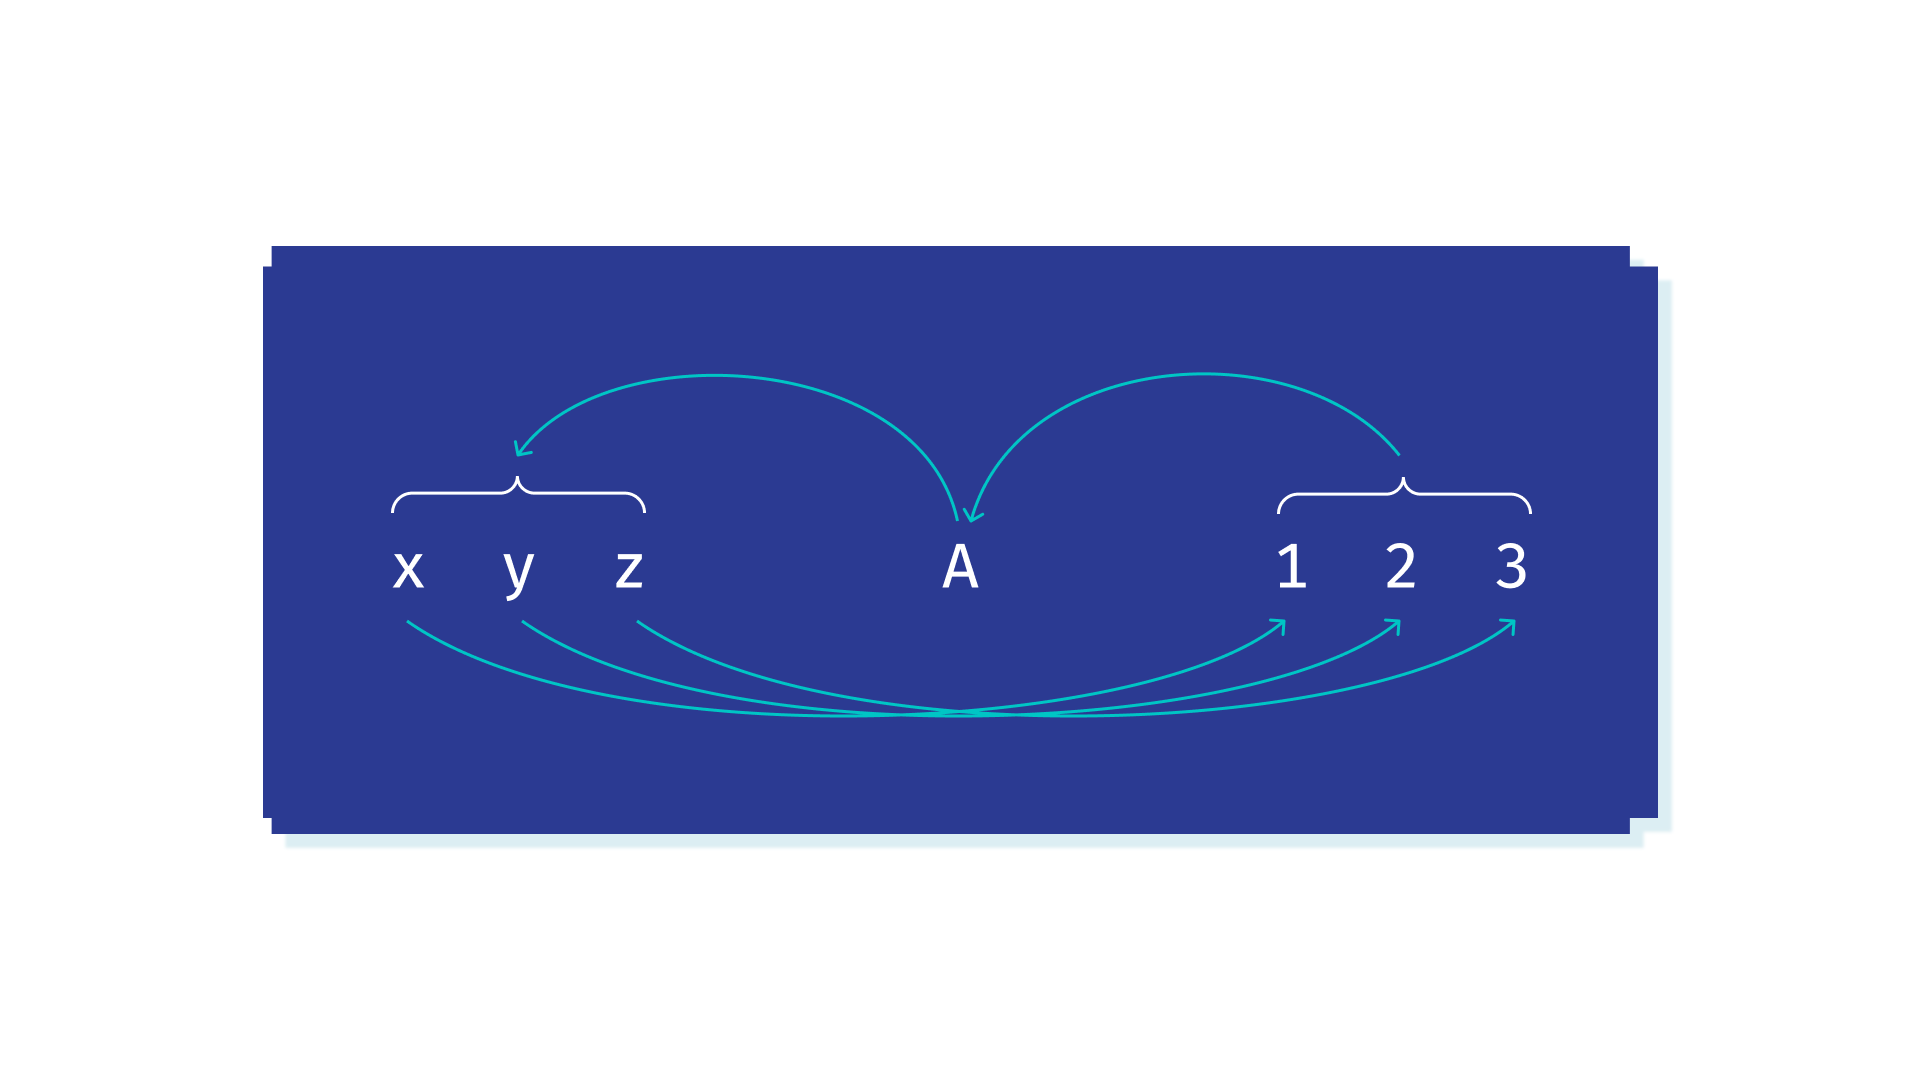

В *кортеж имён* можно присваивать не только *кортеж значений*, но и любой другой *итерируемый объект*, например, строку:

In [ ]:
a, b, c, d, e = "HELLO"
print(a, b, c, d, e)

H E L L O


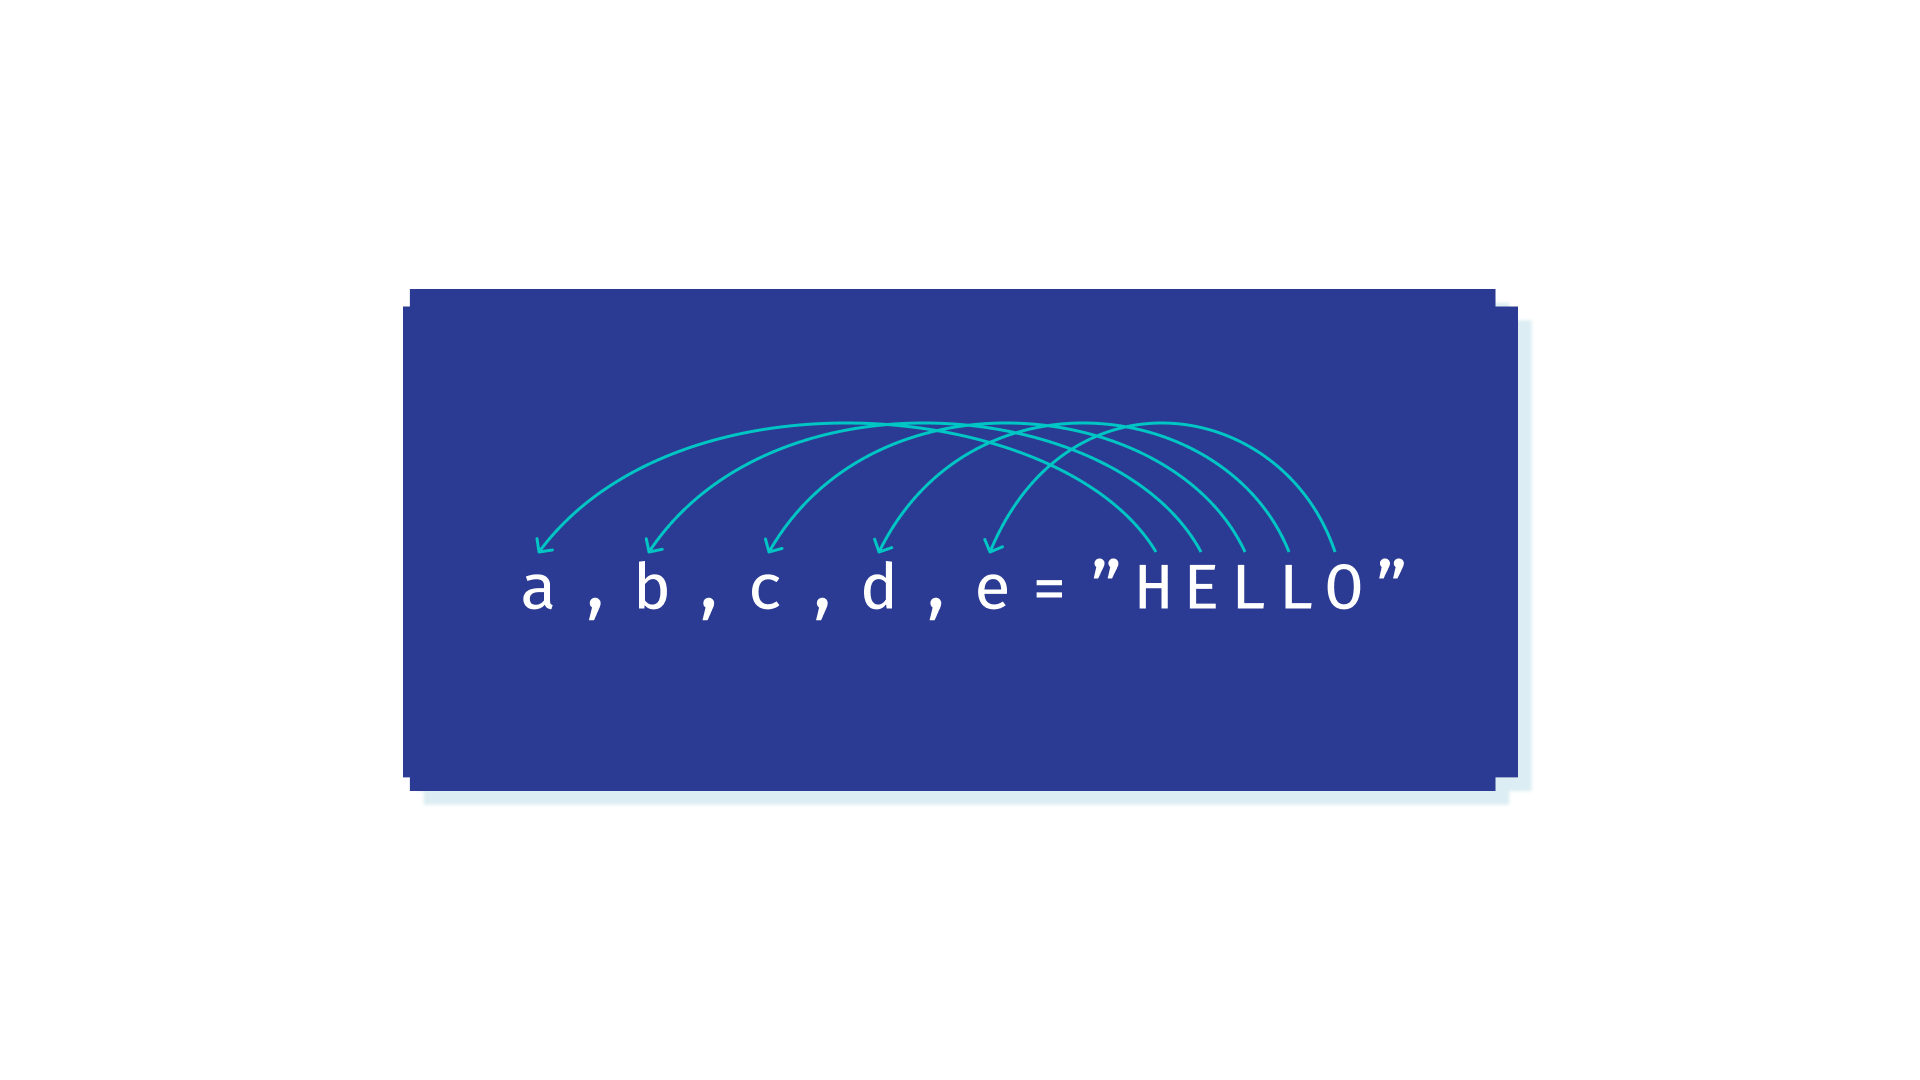

Здесь произошло разворачивание или **распаковка** итерируемого объекта, причём это произошло *без цикла for*!

Если длины кортежей не совпадут, будет ошибка:

In [ ]:
a, b, c = "HELLO"

ValueError: ignored

Исправим это так:

In [ ]:
a, b, c, d, *rest = "Goodby, my dear friend!"
print(a, b, c, d)
print(rest)
print(type(rest))

G o o d
['b', 'y', ',', ' ', 'm', 'y', ' ', 'd', 'e', 'a', 'r', ' ', 'f', 'r', 'i', 'e', 'n', 'd', '!']
<class 'list'>


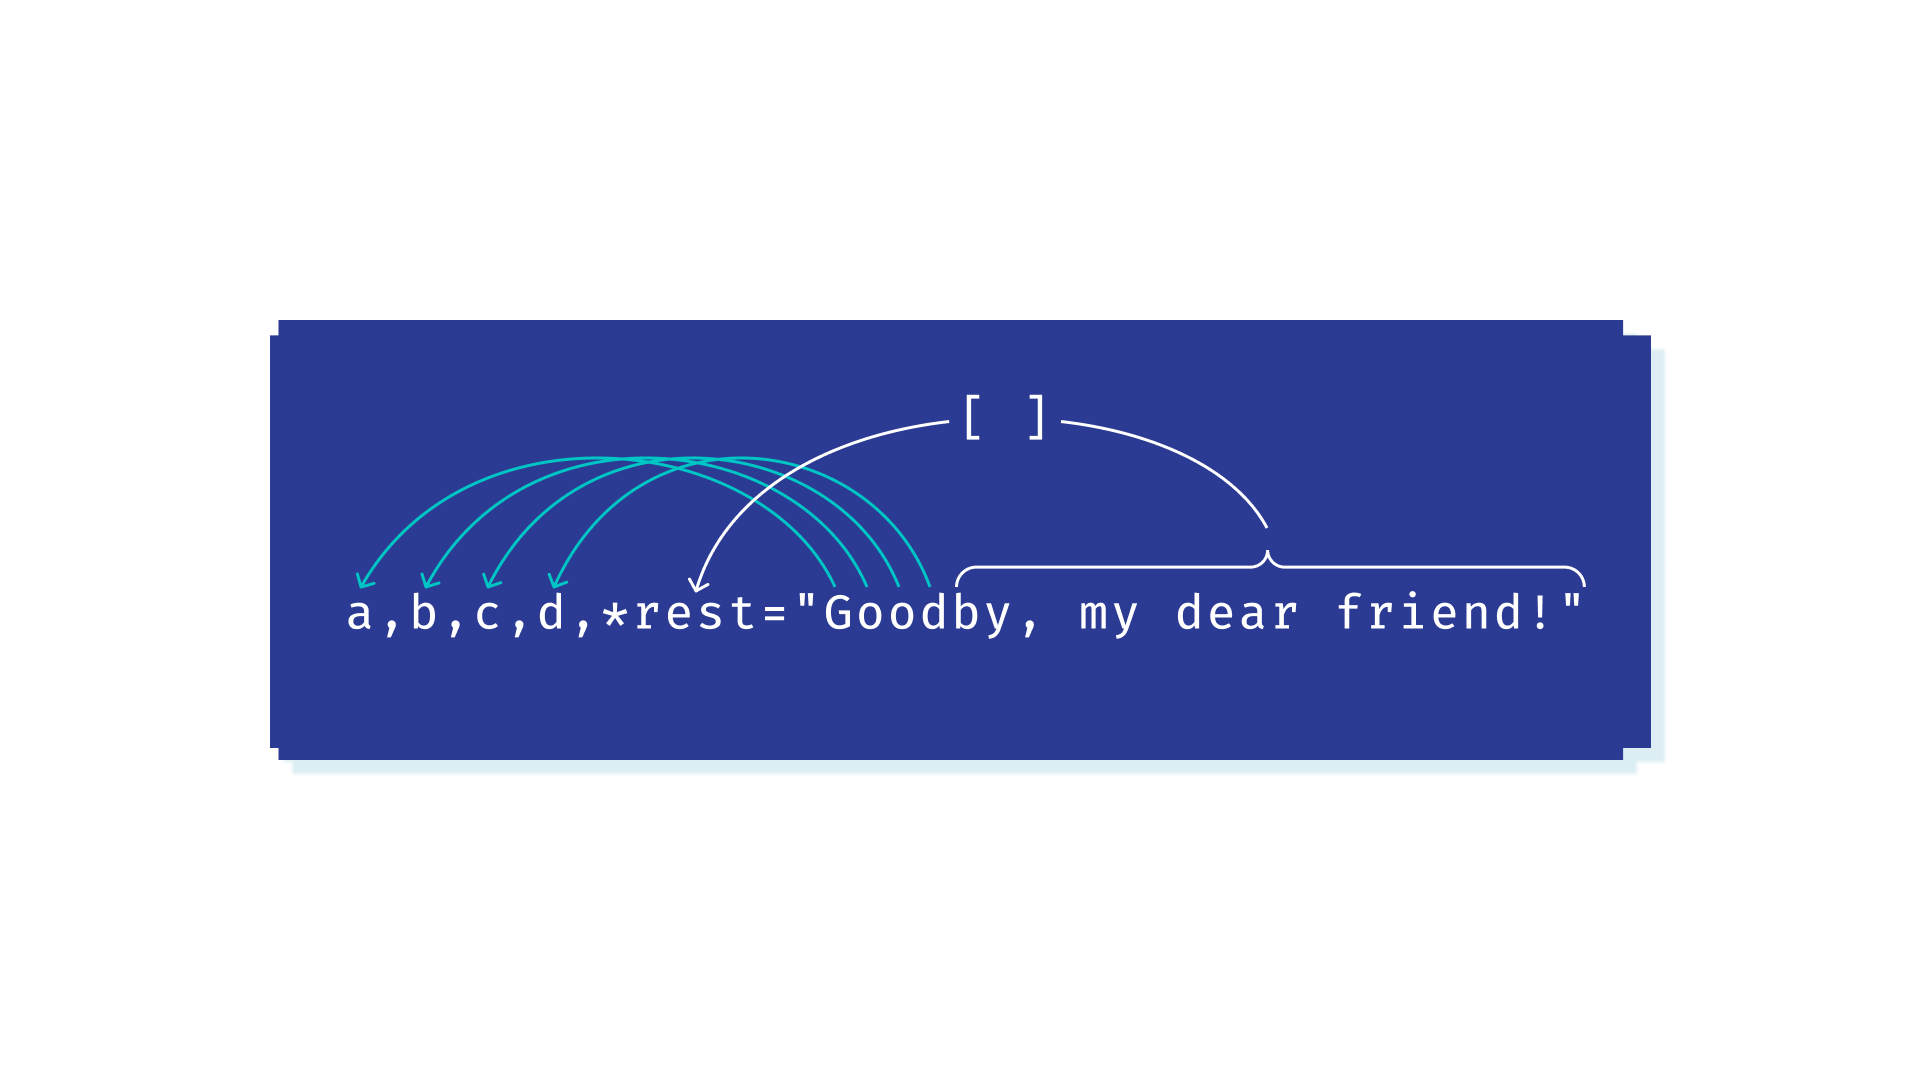

Обратите внимание, что остаток `rest` имеет тип `list`, который выглядит как перечисление значений через запятую в квадратных скобках. Список — очень важный тип, и мы скоро его обсудим.

А пока ещё поиграем с распаковкой итерируемого объекта в переменные и "остаток":

In [ ]:
*rest, a, b, c = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
print(a, b, c)
print(rest)

8 9 10
[1, 2, 3, 4, 5, 6, 7]


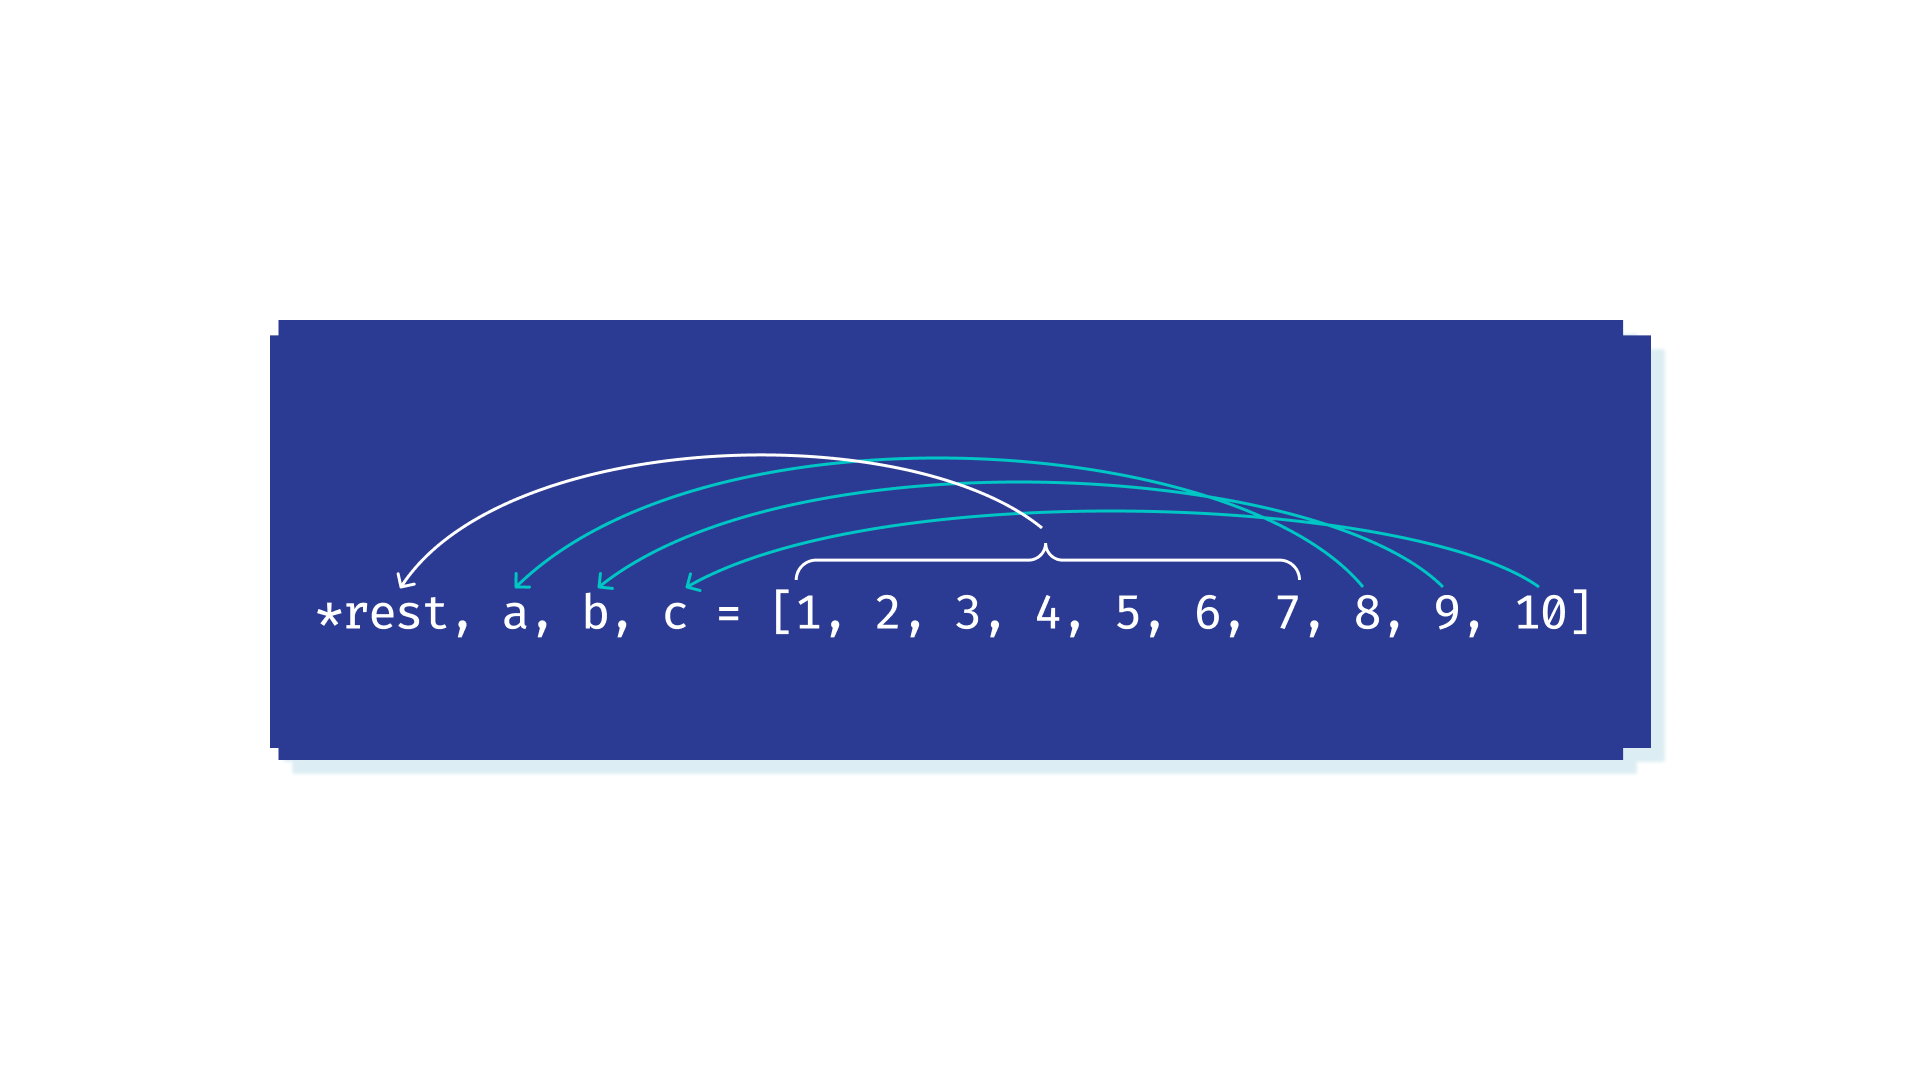

In [ ]:
a, b, *rest, c = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
print(a, b, c)
print(rest)

1 2 10
[3, 4, 5, 6, 7, 8, 9]


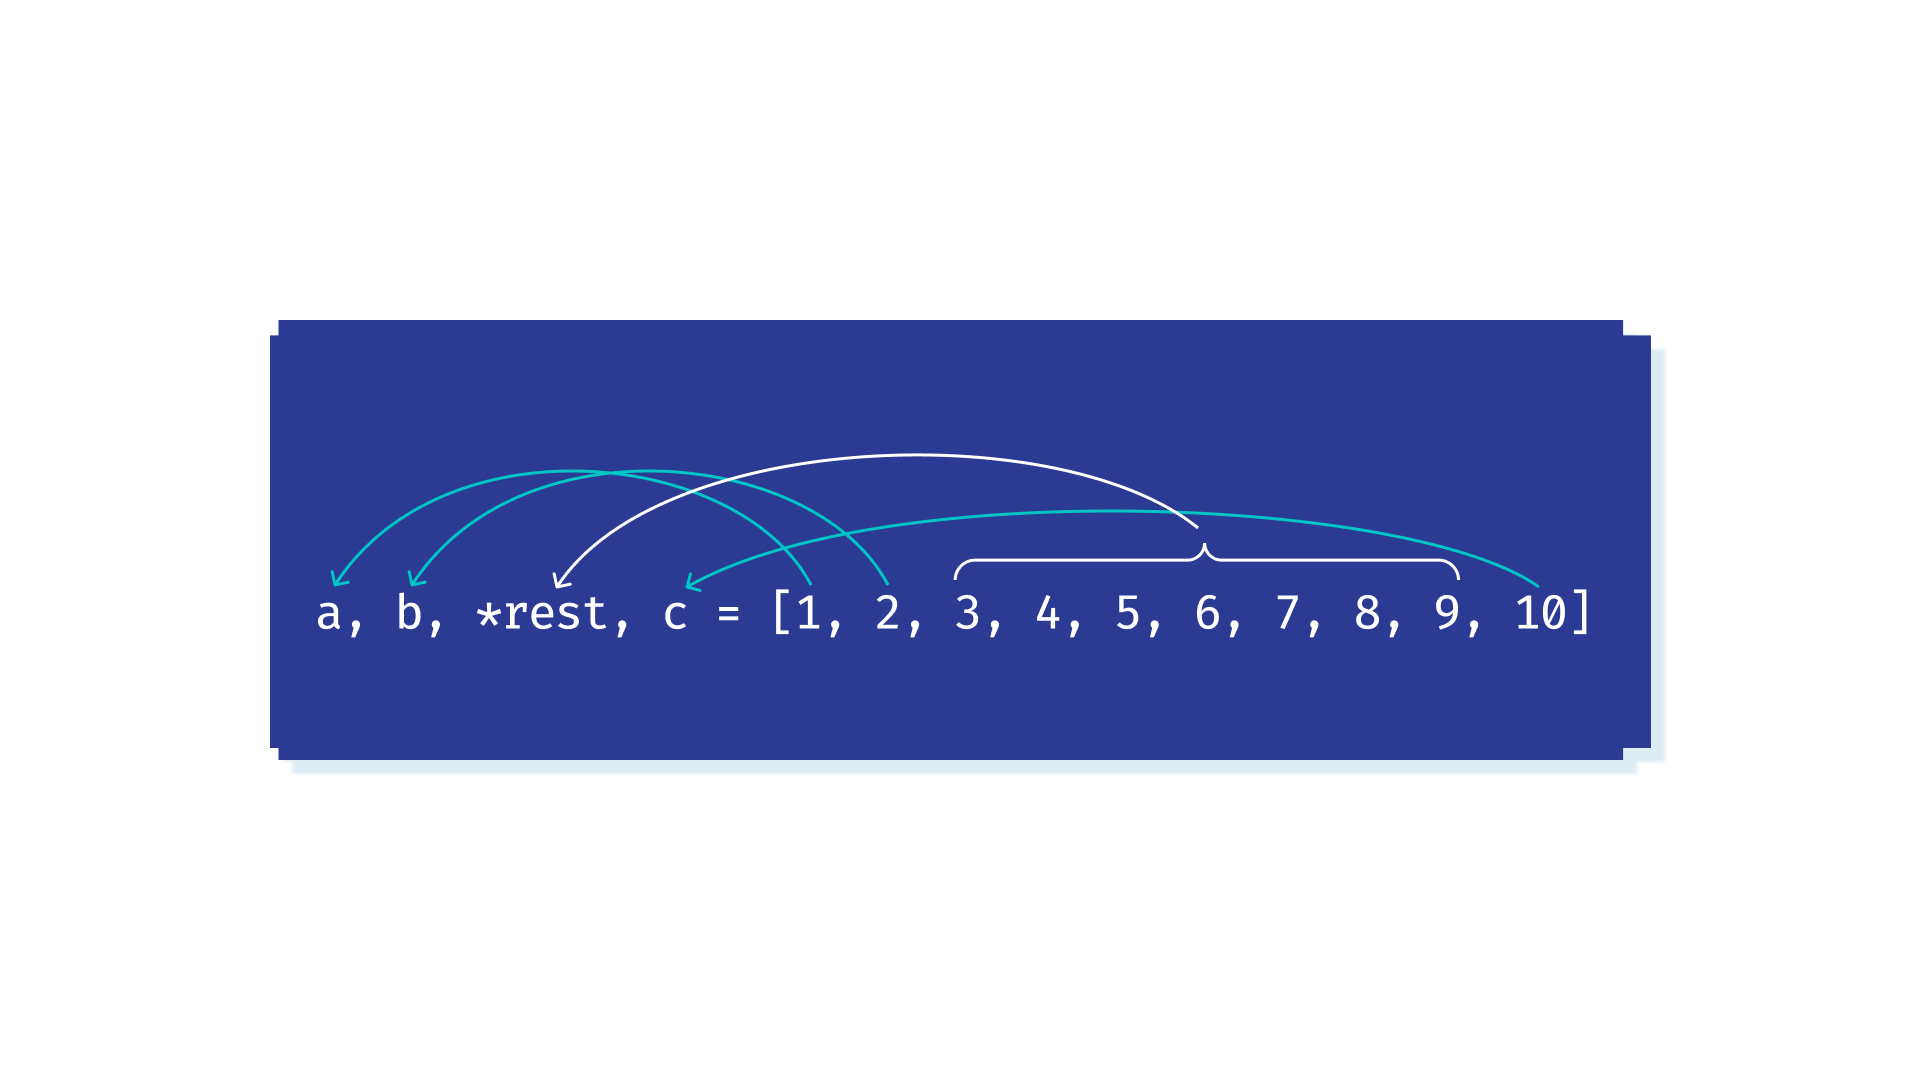

Распаковка итерируемого объекта при передаче значения в функцию, которая готова взять эти значения, как если бы они были переданы через запятую. Например, `print`:

In [ ]:
print(*rest)

3 4 5 6 7 8 9


In [ ]:
s = "Hello"
print(*s, sep="---")  # здесь печатается не вся строка целиком, а *все символы строки*

H---e---l---l---o


Можно пробегать кортежем переменных по списку итерируемых объектов:


In [ ]:
for a, b, c in "АБВ", "ГДЕ", "ЁЖЗ":
  print(a, b, c, sep='\t')

А	Б	В
Г	Д	Е
Ё	Ж	З


# Тип list. Конструирование списка.
Давайте обсудим подробнее тип `list`.
Создать список можно двумя способами — перечислением объектов в квадратных скобках через запятую или *через конструктор*:

In [ ]:
a = ['1', '2', '3', '4', '5'] #перечисление объектов в квадратных скобках через запятую
b = list('12345') # через конструктор
print(a, b)
print(a == b)  # равные друг другу списки
print(a is b)  # могут быть разными объектами

['1', '2', '3', '4', '5'] ['1', '2', '3', '4', '5']
True
False


Обратите внимание на создание списка `b`. Переданная в конструктор `list` строка распаковывается автоматически, звёздочка перед ней не нужна.

Если список строк нужно собрать, склеить обратно в единую строку, это делается при помощи `join`:

In [ ]:
s = ''.join(a)
print(type(s))
s

<class 'str'>


'12345'

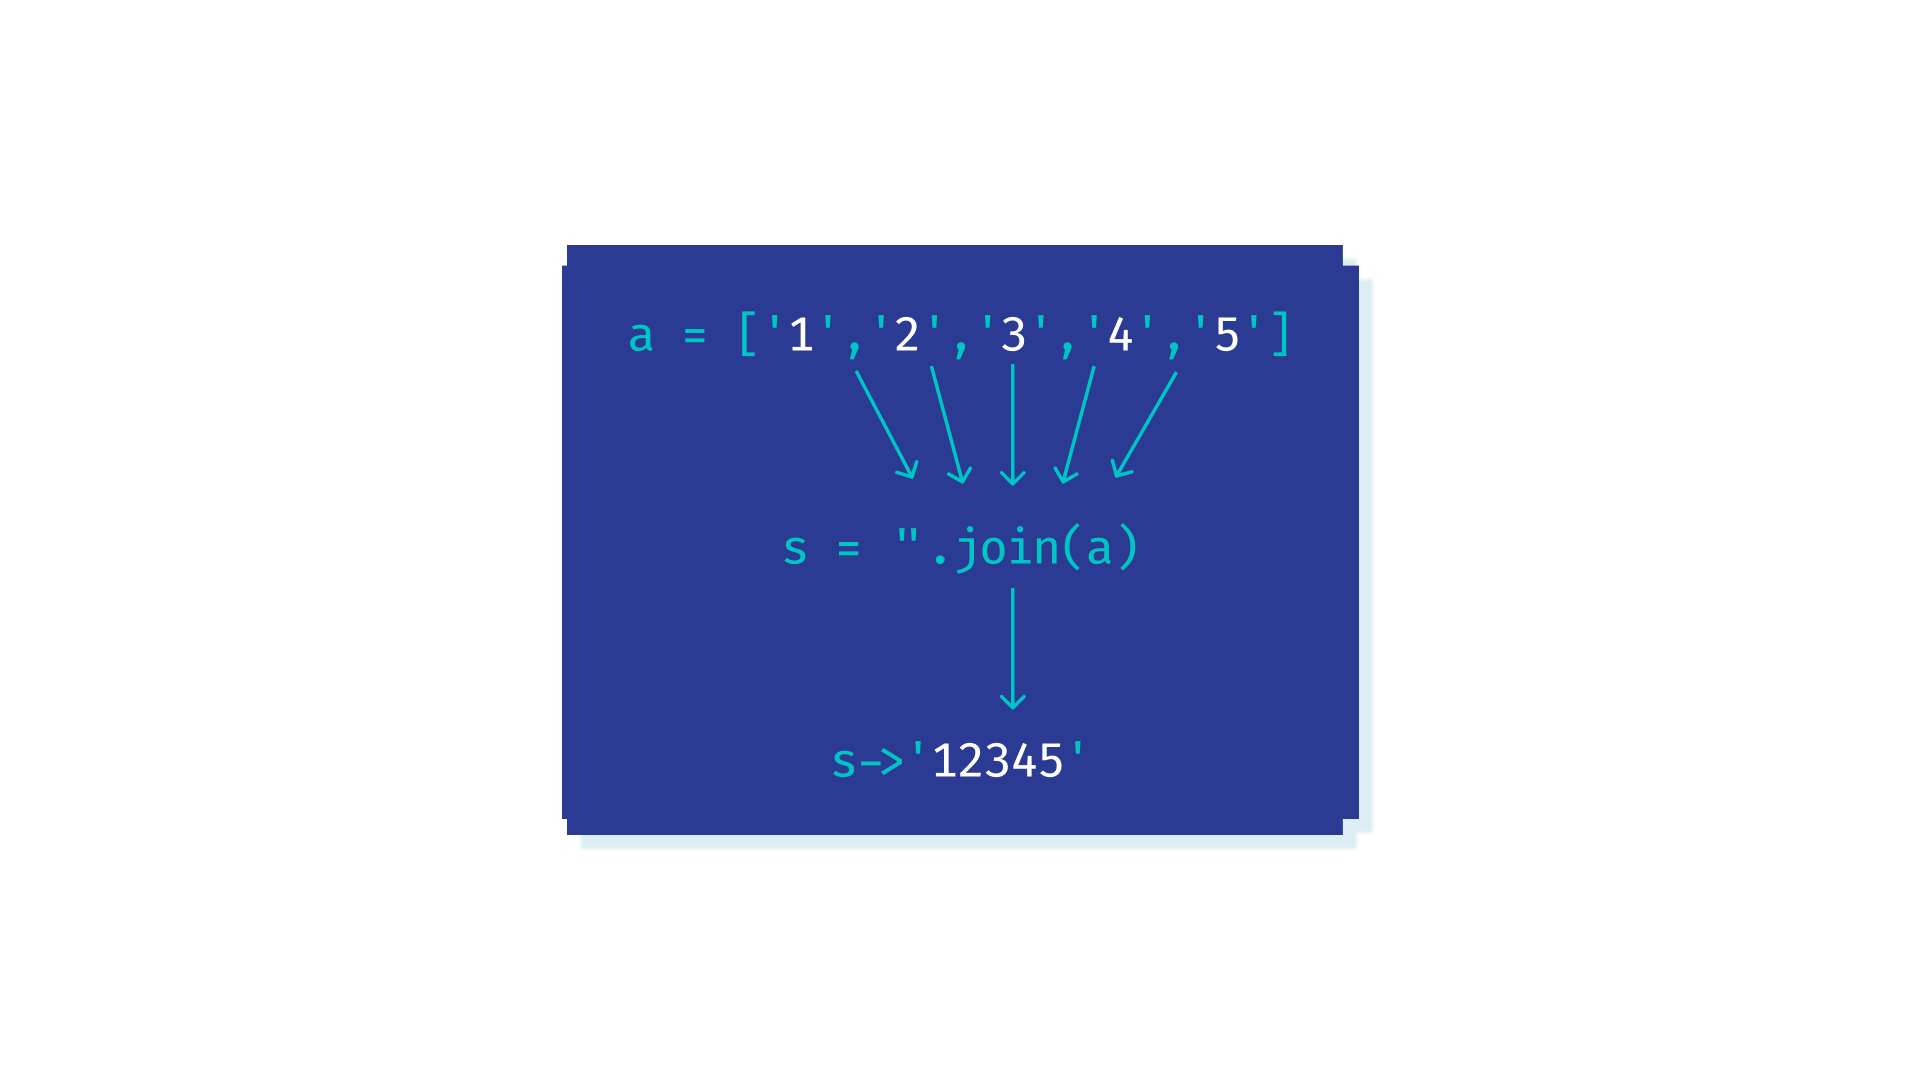

In [ ]:
'***'.join(a)

'1***2***3***4***5'

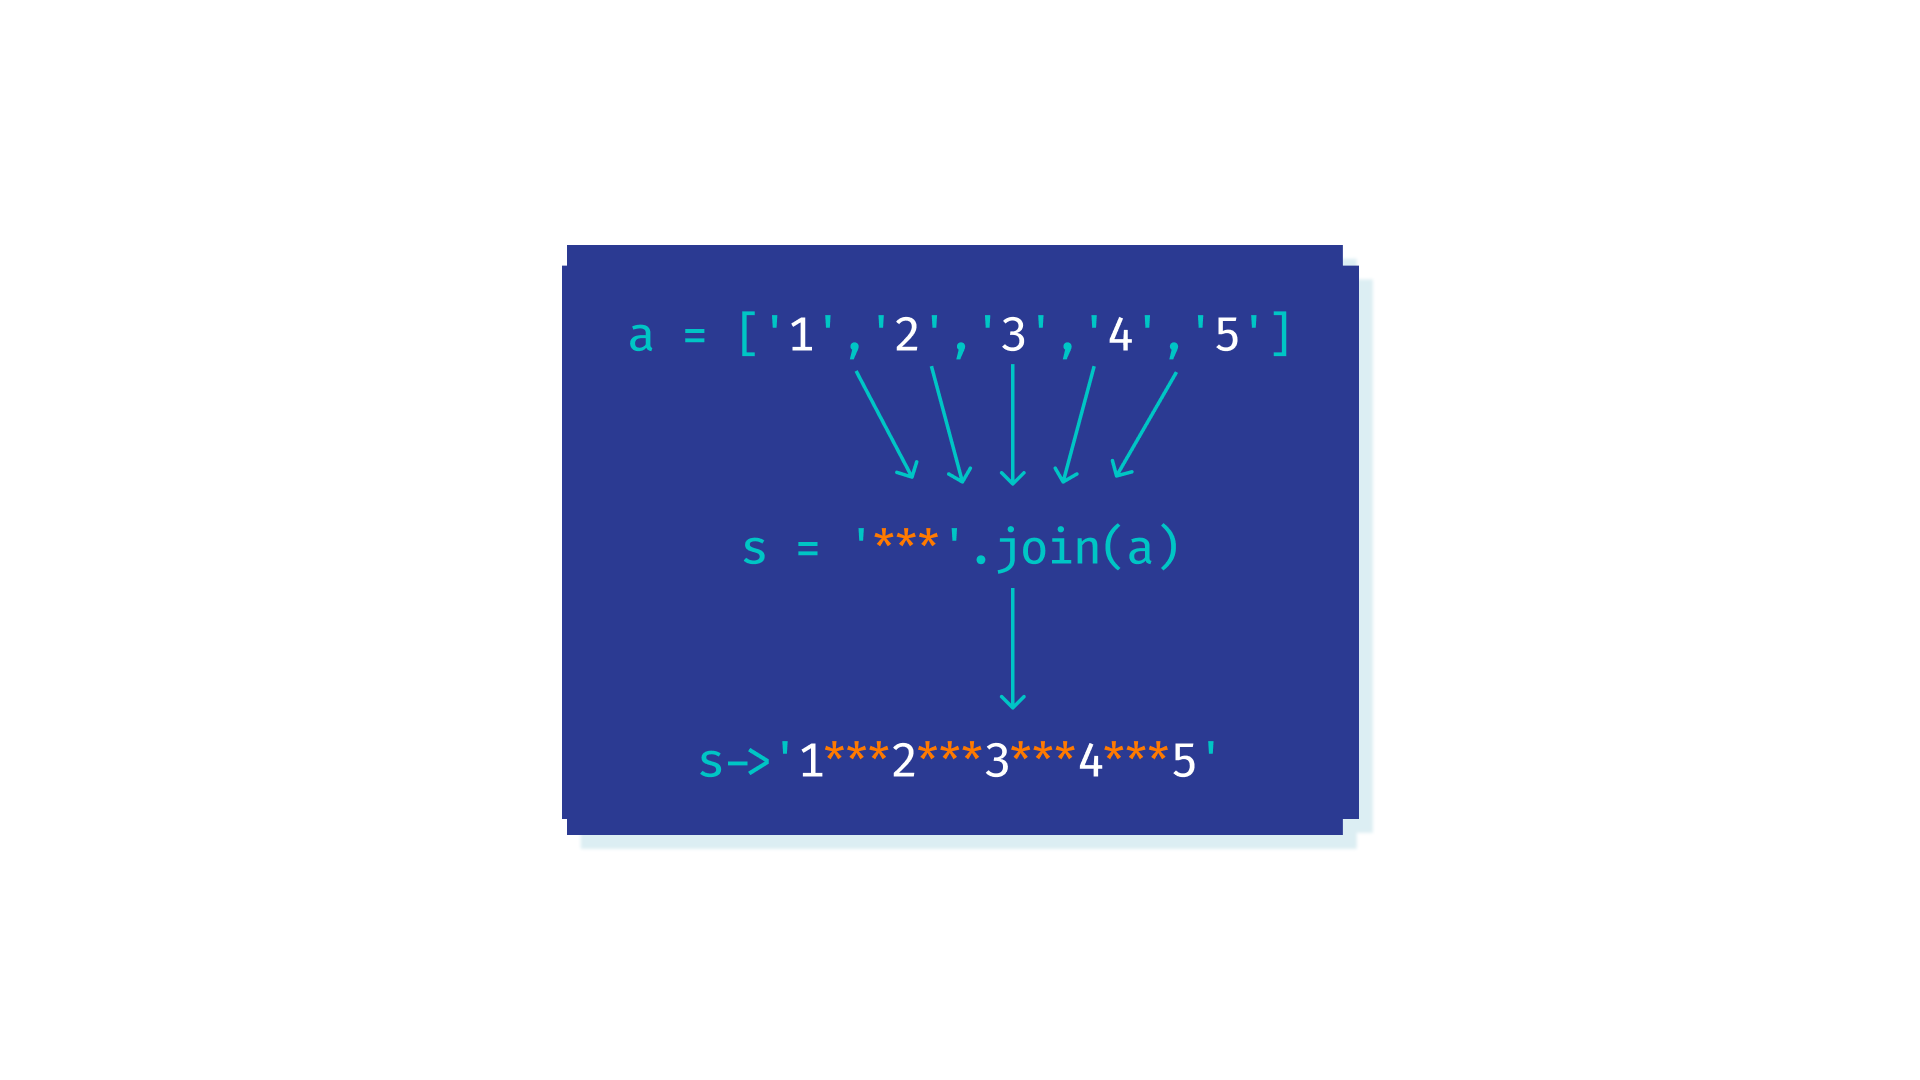

Откуда взять список строк? Например, разрезать исходную строку по пробелам (это стандартный *сепаратор*) при помощи метода строки `split`:

In [ ]:
s = "Кто не работает, тот не ест!"
a = s.split()
print(a)
print(type(a))

['Кто', 'не', 'работает,', 'тот', 'не', 'ест!']
<class 'list'>


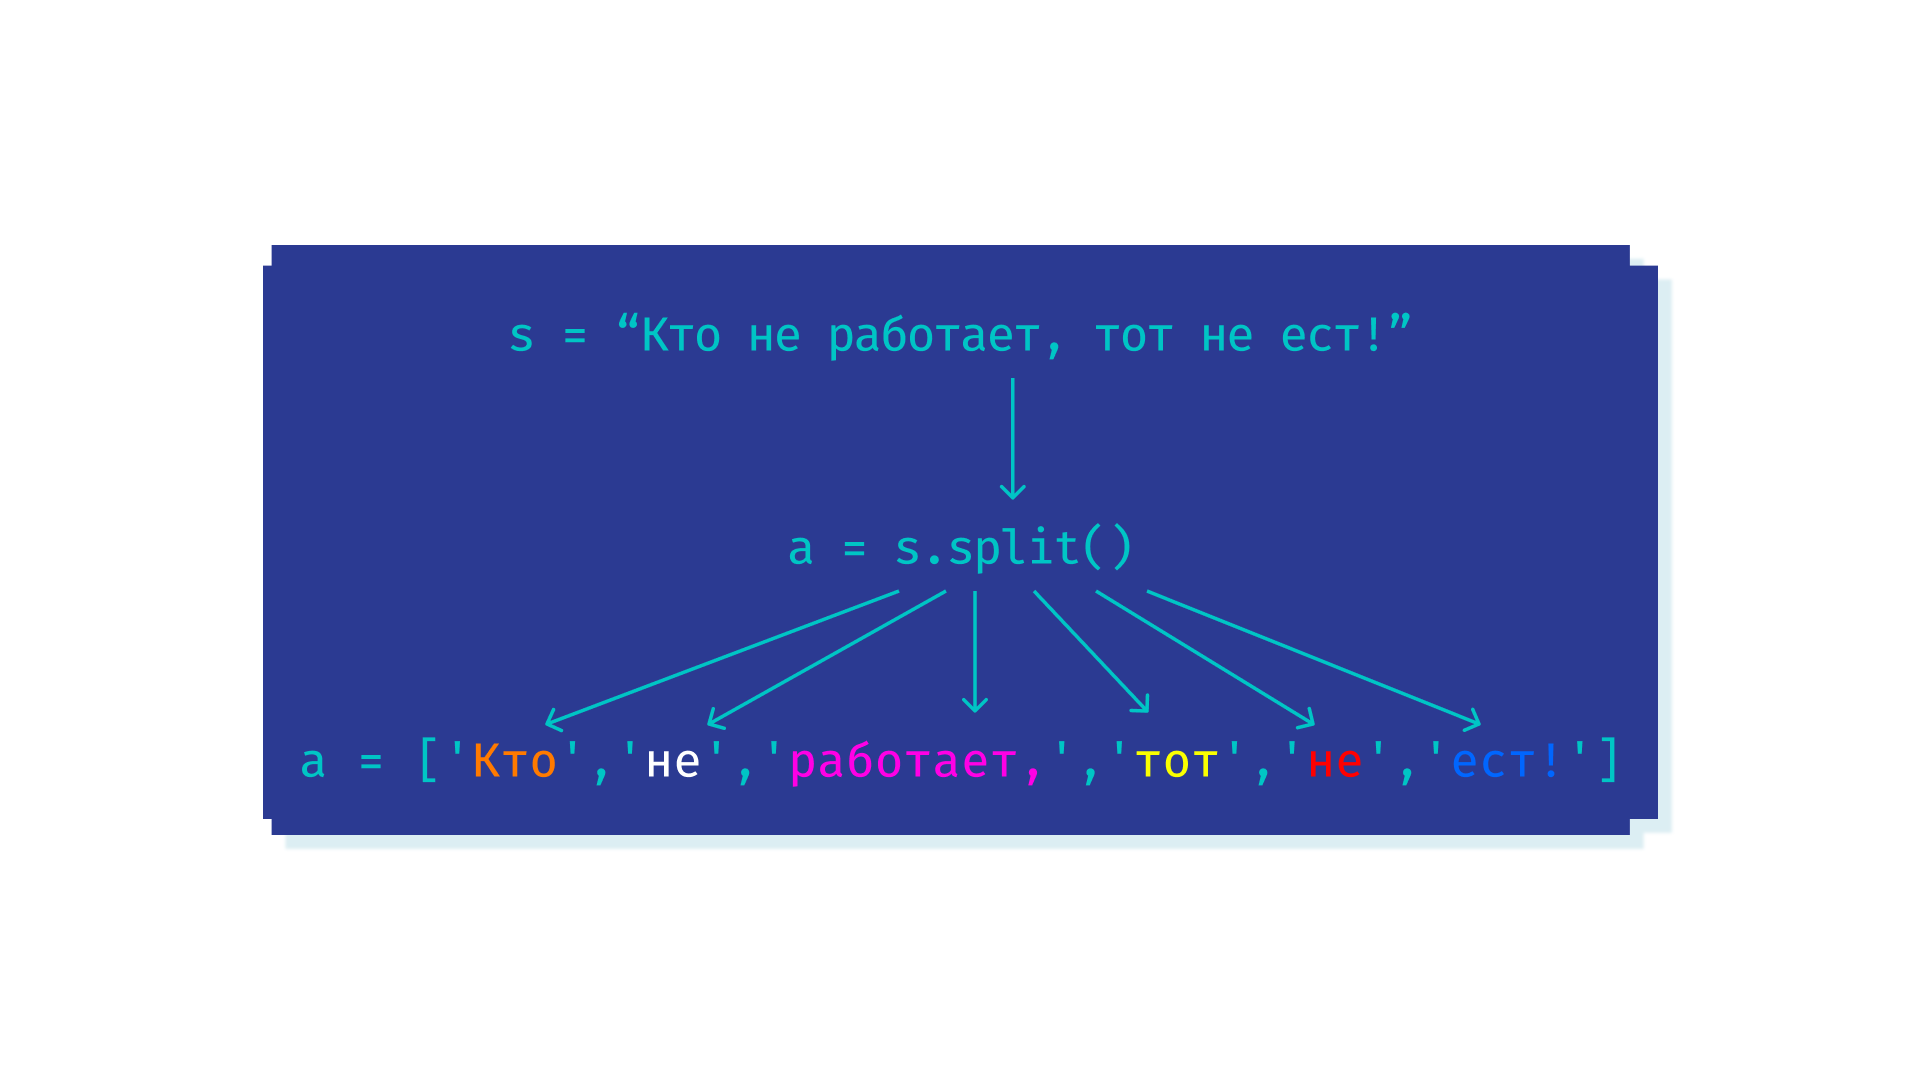

Любая строка подойдёт как разделитель:

In [ ]:
print(s.split(', '))

['Кто не работает', 'тот не ест!']


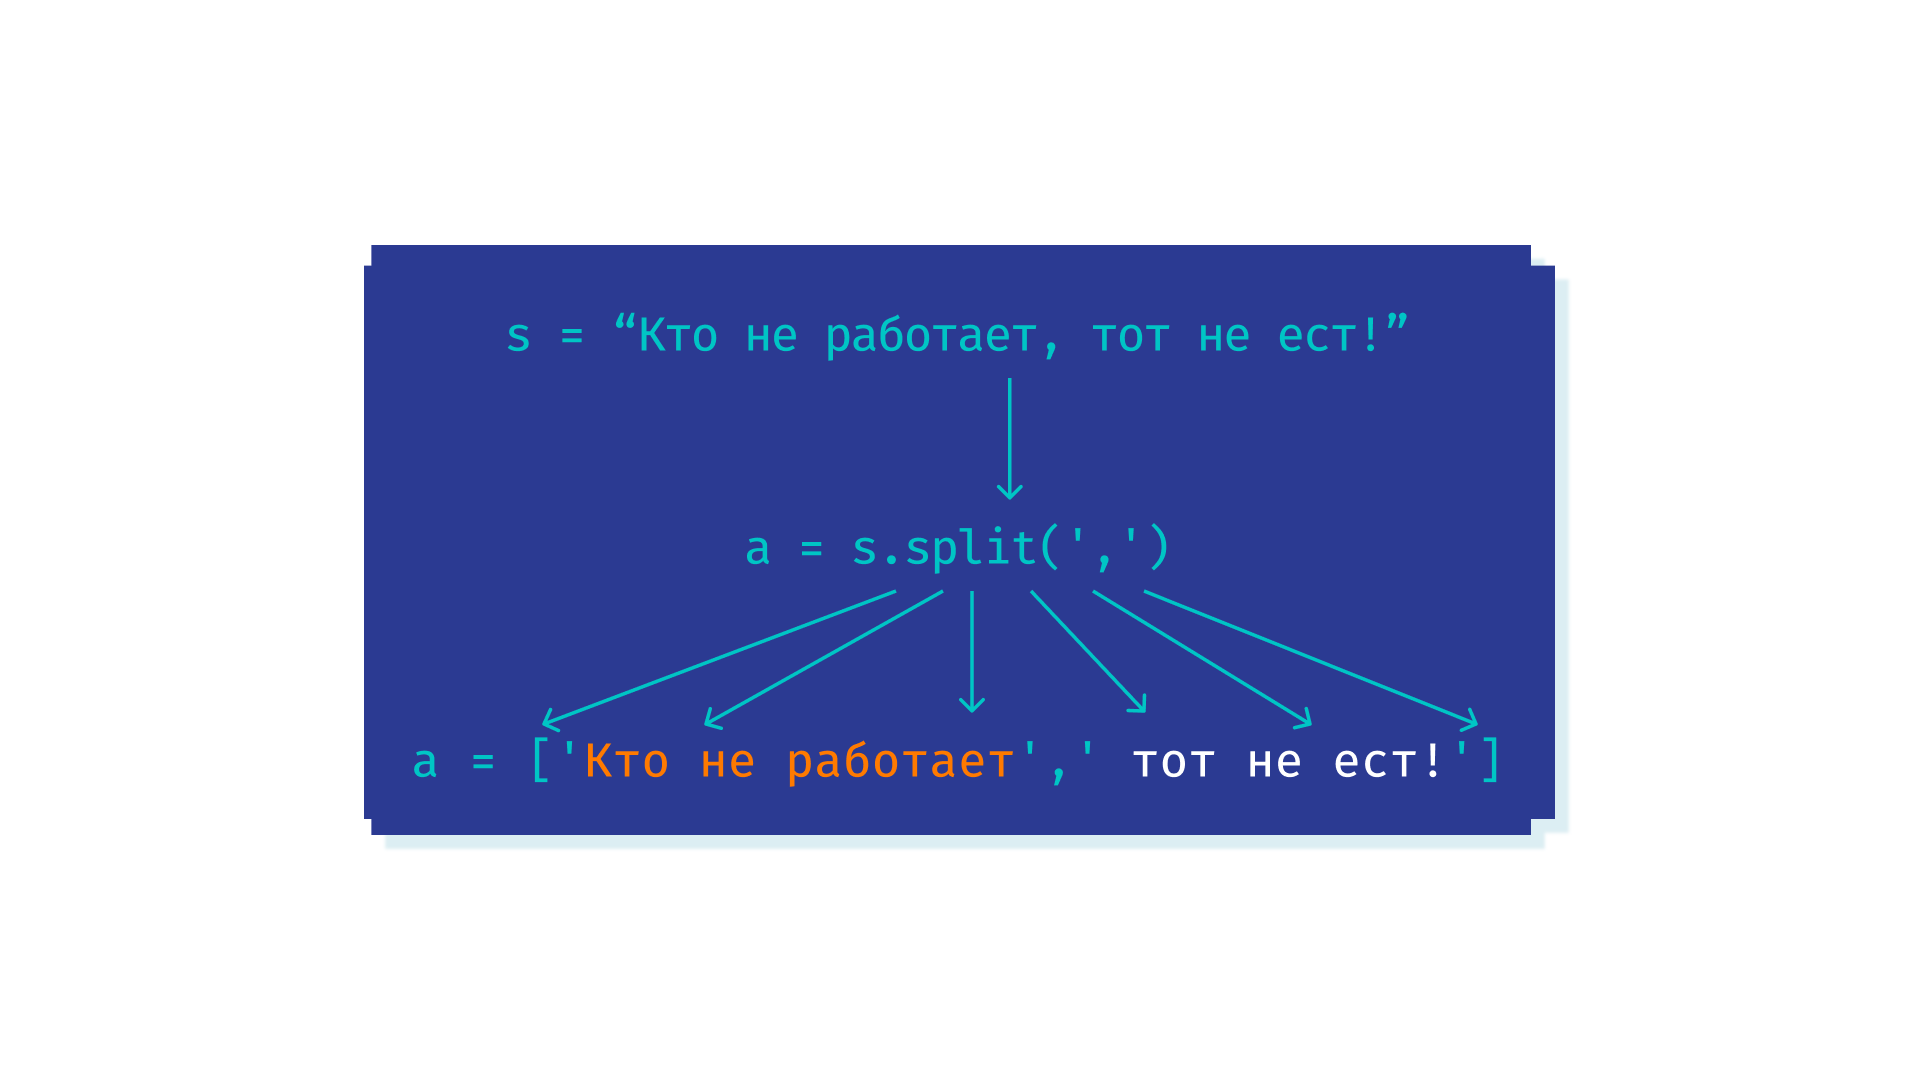

## Срезы списка 
Рассмотрим пример:


In [ ]:
text = """Любовь долготерпит, милосердствует, любовь не завидует,
          любовь не превозносится, не гордится, не бесчинствует, не ищет своего,
          не раздражается, не мыслит зла, не радуется неправде, а сорадуется истине;
          все покрывает, всему верит, всего надеется, все переносит."""
words = text.split() #  разбиваем строку text по пробелам на отдельные слова

In [ ]:
words# в итоге получается список из слов строки 

['Любовь',
 'долготерпит,',
 'милосердствует,',
 'любовь',
 'не',
 'завидует,',
 'любовь',
 'не',
 'превозносится,',
 'не',
 'гордится,',
 'не',
 'бесчинствует,',
 'не',
 'ищет',
 'своего,',
 'не',
 'раздражается,',
 'не',
 'мыслит',
 'зла,',
 'не',
 'радуется',
 'неправде,',
 'а',
 'сорадуется',
 'истине;',
 'все',
 'покрывает,',
 'всему',
 'верит,',
 'всего',
 'надеется,',
 'все',
 'переносит.']

Мы можем выбрать любой элемент списка, обратившись к нему по индексу.

In [ ]:
words[3]

'любовь'

Срезы списков аналогичны срезам строк. Можно использовать срезы с двумя `words[start:stop]` или тремя параметрами `words[start:stop:step]`.

In [ ]:
words[0:9] #в полученный список попадают элементы исходного списка с 0-го по 8-ый (9-ый элемент не попадает)

['Любовь',
 'долготерпит,',
 'милосердствует,',
 'любовь',
 'не',
 'завидует,',
 'любовь',
 'не',
 'превозносится,']

In [ ]:
words[7:20:2] #выбираются элементы с 7-го по 19-ый с шагом 2, то есть через один

['не', 'не', 'не', 'не', 'своего,', 'раздражается,', 'мыслит']

Мы можем использовать отрицательный шаг. В следующем примере в срез попадут элементы исходного списка с 19-го по 7-ой с обратном порядке. 

In [ ]:
words[19: 6: -1]

['мыслит',
 'не',
 'раздражается,',
 'не',
 'своего,',
 'ищет',
 'не',
 'бесчинствует,',
 'не',
 'гордится,',
 'не',
 'превозносится,',
 'не']

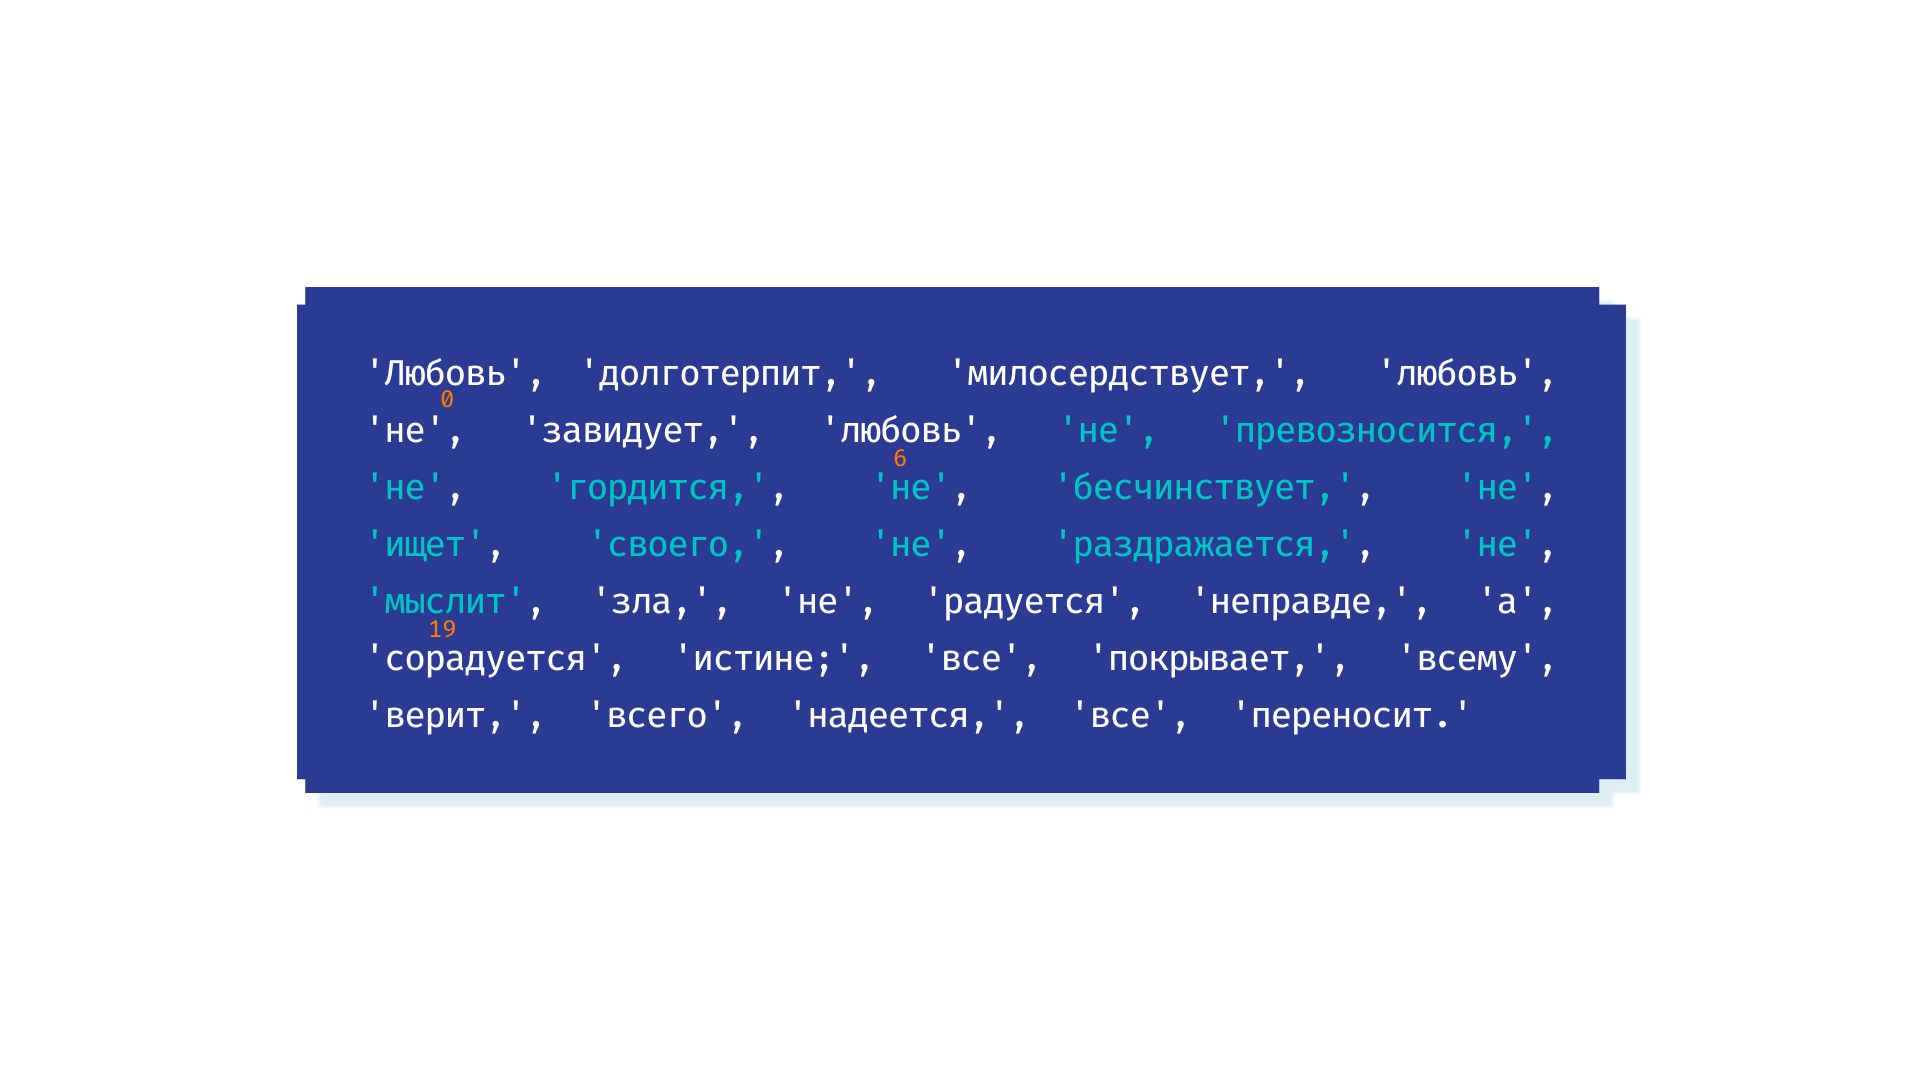

В этом примере тоже с 19-го по 7-ой в обртном порядке, но с шагом 2.

In [ ]:
words[19: 6: -2]

['мыслит', 'раздражается,', 'своего,', 'не', 'не', 'не', 'не']

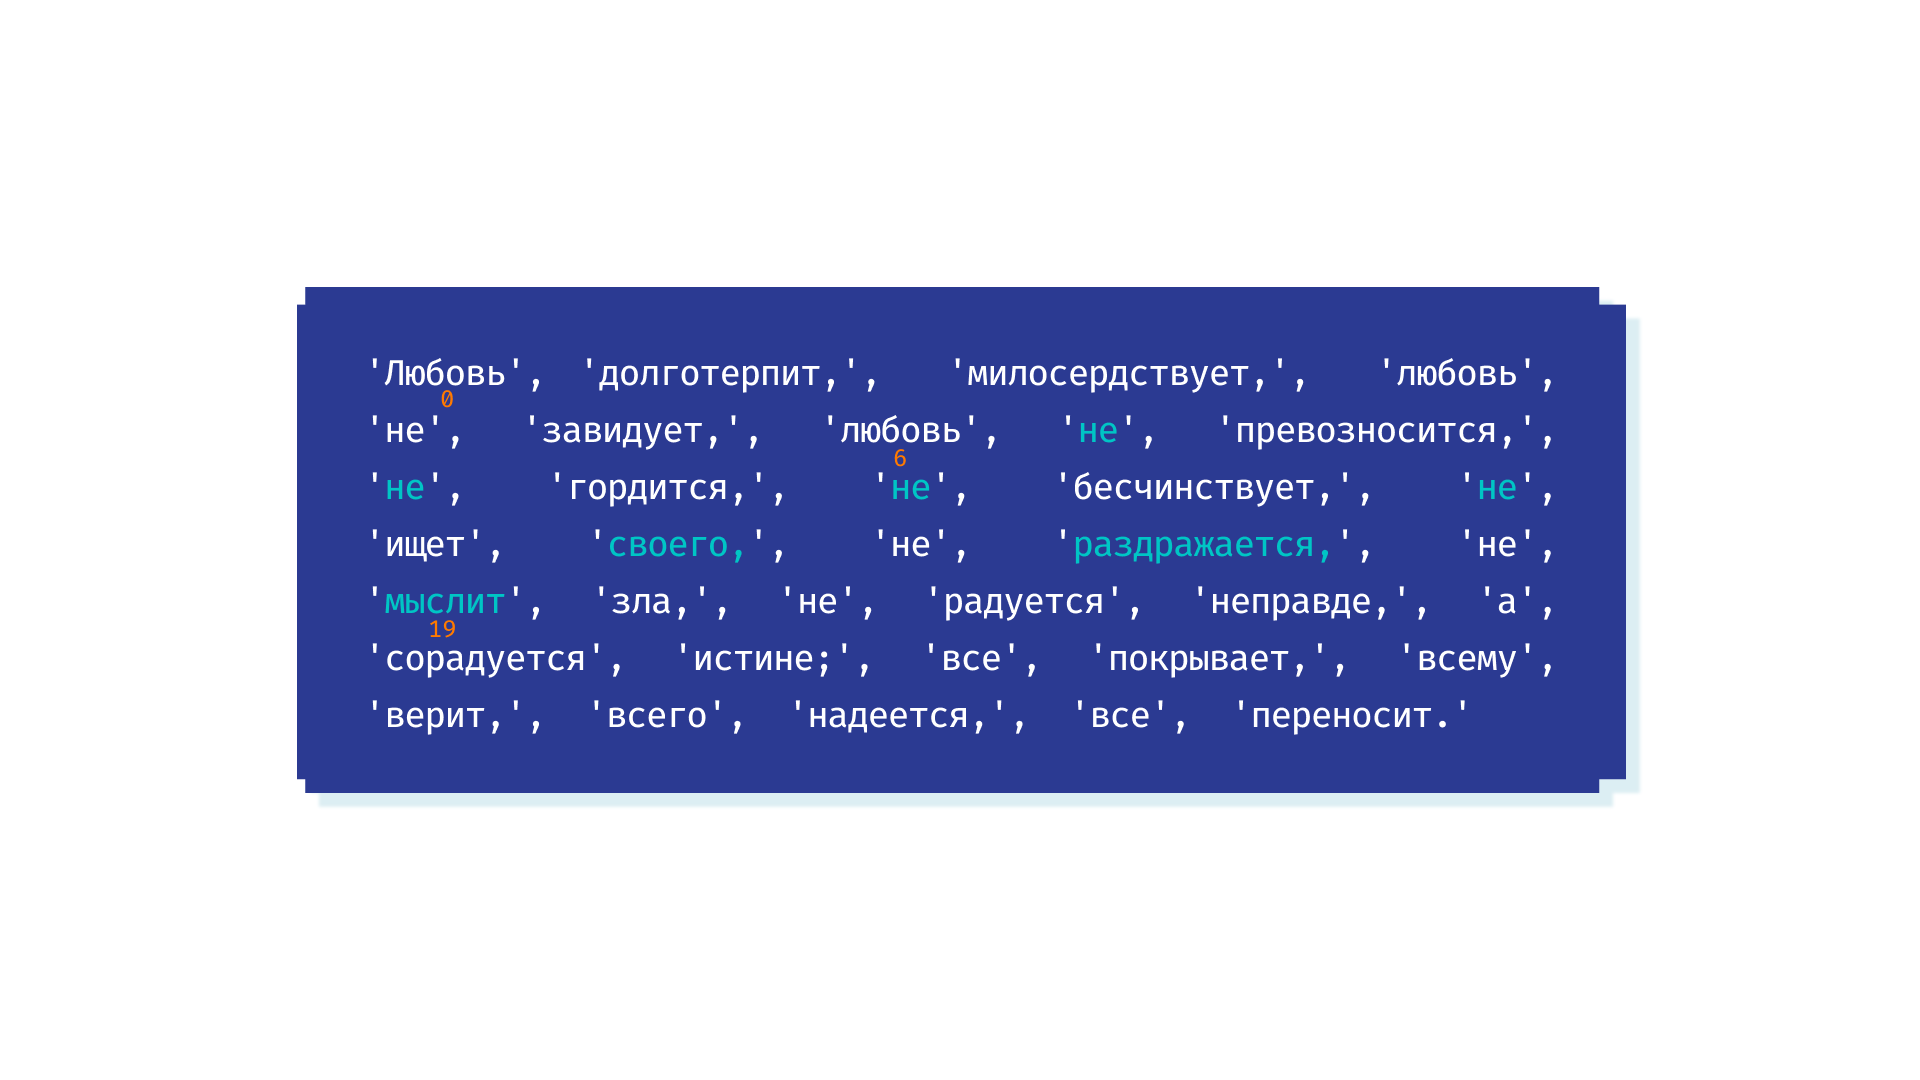

А таким образом мы можем "развернуть" исходный список:

In [ ]:
words[::-1]

['переносит.',
 'все',
 'надеется,',
 'всего',
 'верит,',
 'всему',
 'покрывает,',
 'все',
 'истине;',
 'сорадуется',
 'а',
 'неправде,',
 'радуется',
 'не',
 'зла,',
 'мыслит',
 'не',
 'раздражается,',
 'не',
 'своего,',
 'ищет',
 'не',
 'бесчинствует,',
 'не',
 'гордится,',
 'не',
 'превозносится,',
 'не',
 'любовь',
 'завидует,',
 'не',
 'любовь',
 'милосердствует,',
 'долготерпит,',
 'Любовь']

Обратите внимание, что списки, как и строки, можно склеивать при помощи `+`. Операция работает как *конкатенация*. Результатом операции является новый список.

In [ ]:
['a', 'b', 'c'] + ['d', 'e']

['a', 'b', 'c', 'd', 'e']

Умножение на положительное целое число также работает и значит многократную конкатенацию:

In [ ]:
['a', 'b', 'c'] * 3

['a', 'b', 'c', 'a', 'b', 'c', 'a', 'b', 'c']

Однако умножать список на список нельзя:

In [ ]:
['a', 'b', 'c'] * ['d', 'e']

TypeError: ignored

Кстати, строку, если она содержит много строк (т.е. содержит символы "новой строки" `"\n"`) можно разбить на строки.

In [ ]:
text = """Любовь долготерпит, милосердствует, любовь не завидует,
          любовь не превозносится, не гордится, не бесчинствует, не ищет своего,
          не раздражается, не мыслит зла, не радуется неправде, а сорадуется истине;
          все покрывает, всему верит, всего надеется, все переносит."""
lines = text.splitlines()
lines

['Любовь долготерпит, милосердствует, любовь не завидует,',
 '          любовь не превозносится, не гордится, не бесчинствует, не ищет своего,',
 '          не раздражается, не мыслит зла, не радуется неправде, а сорадуется истине;',
 '          все покрывает, всему верит, всего надеется, все переносит.']

Обратите внимание на пробелы в начале строк. Раздражают, не так ли? Конечно, у строки есть метод `strip()`, но как применить его _ко всем строкам в списке_?

`s.strip(chars)` - удаляет символы `chars` в начале и конце строки. По умолчанию (`s.strip()`) удаляются пробелы.

# Потоковая обработка списков

## Генераторы и списковые включения («генераторы списков»)

Ещё один способ создать список, кроме генератора `list` и прямого перечисления — **списковое включение** (*list comrehensions*). Данный термин не прижился в русскоязычном комьюнити Python, про них говорят *генераторы списков*.

Работает это так: у вас уже есть список или итерируемый объект, и вы хотите создать другой на его основе, применив какую-то операцию.

In [ ]:
stripped_lines = [line.strip() for line in lines]
stripped_lines

['Любовь долготерпит, милосердствует, любовь не завидует,',
 'любовь не превозносится, не гордится, не бесчинствует, не ищет своего,',
 'не раздражается, не мыслит зла, не радуется неправде, а сорадуется истине;',
 'все покрывает, всему верит, всего надеется, все переносит.']

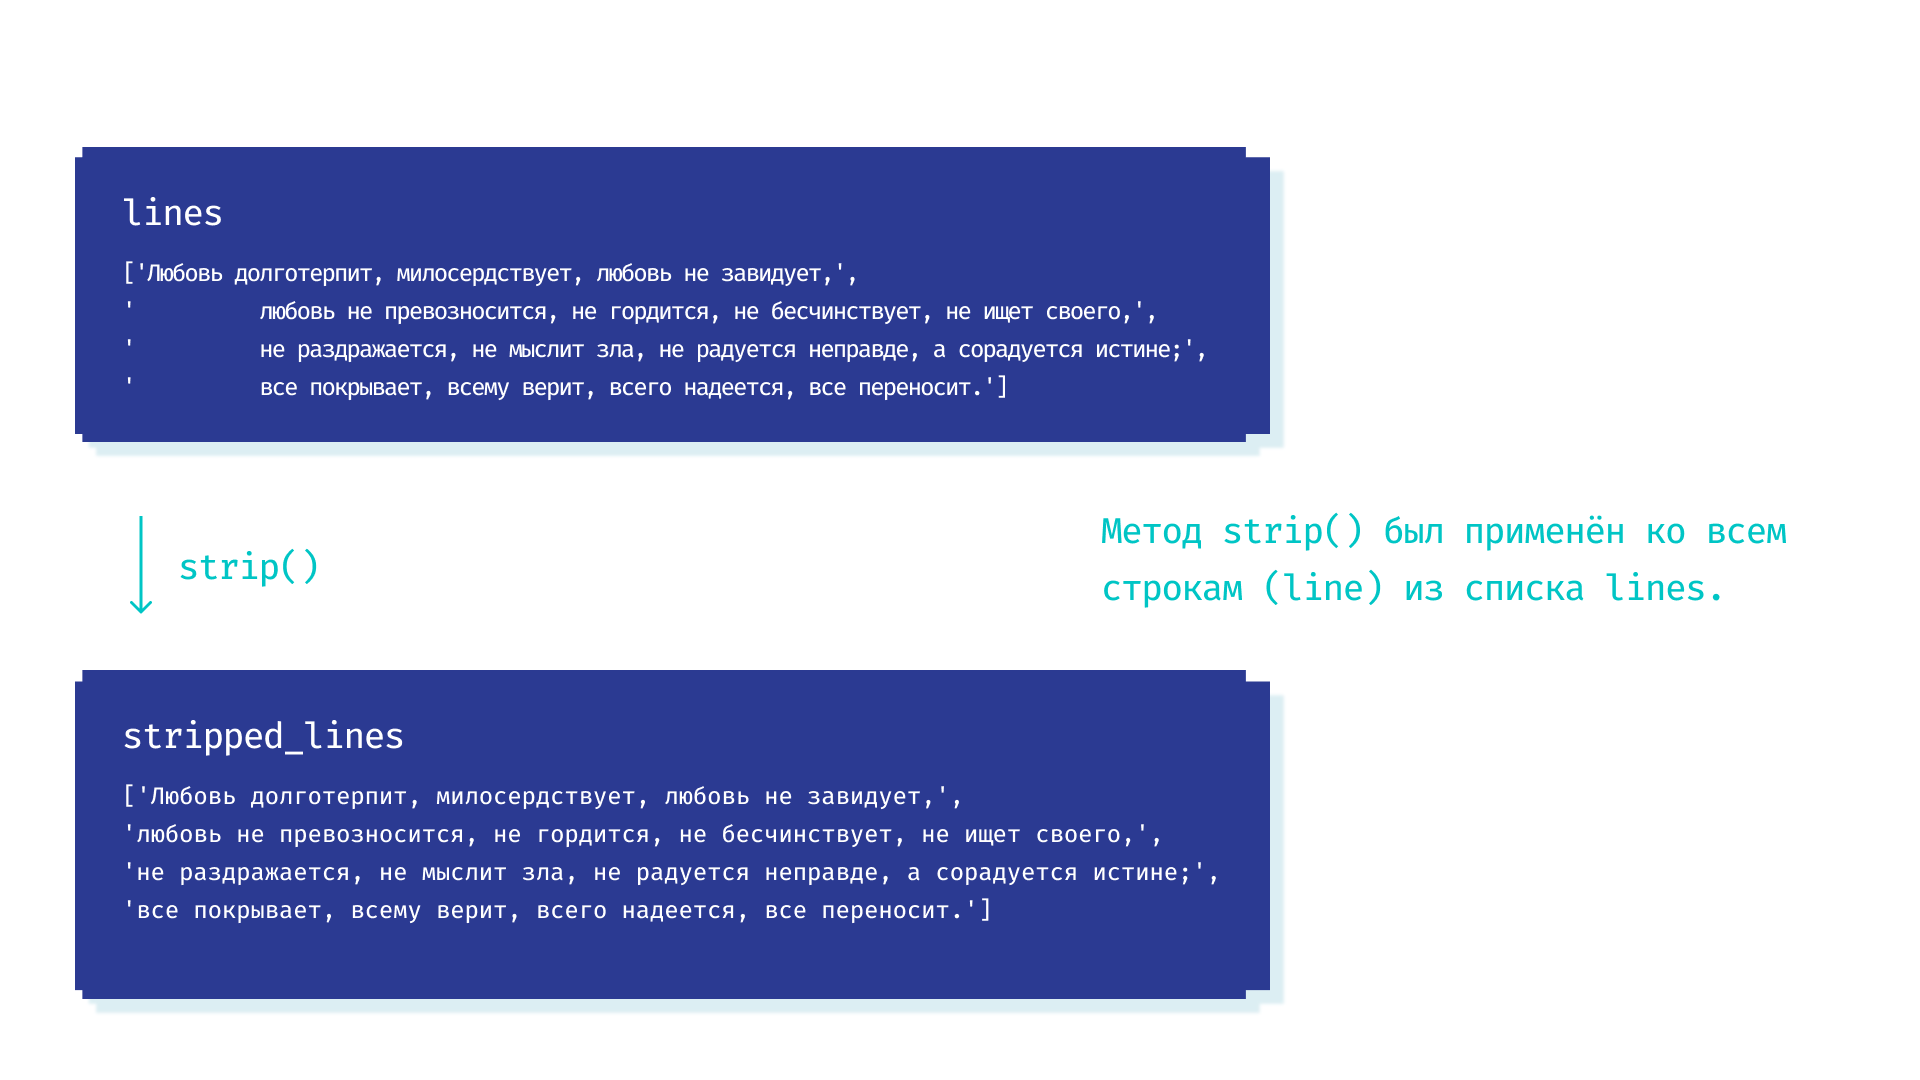

В новый список можно взять не все строки, а отфильтровать их по какому-то признаку. Например, так:

In [ ]:
filtered_lines = [line for line in stripped_lines if 'любовь' in line] # в новый список выбираем только те строки, в которых есть слово "любовь"
filtered_lines

['Любовь долготерпит, милосердствует, любовь не завидует,',
 'любовь не превозносится, не гордится, не бесчинствует, не ищет своего,']

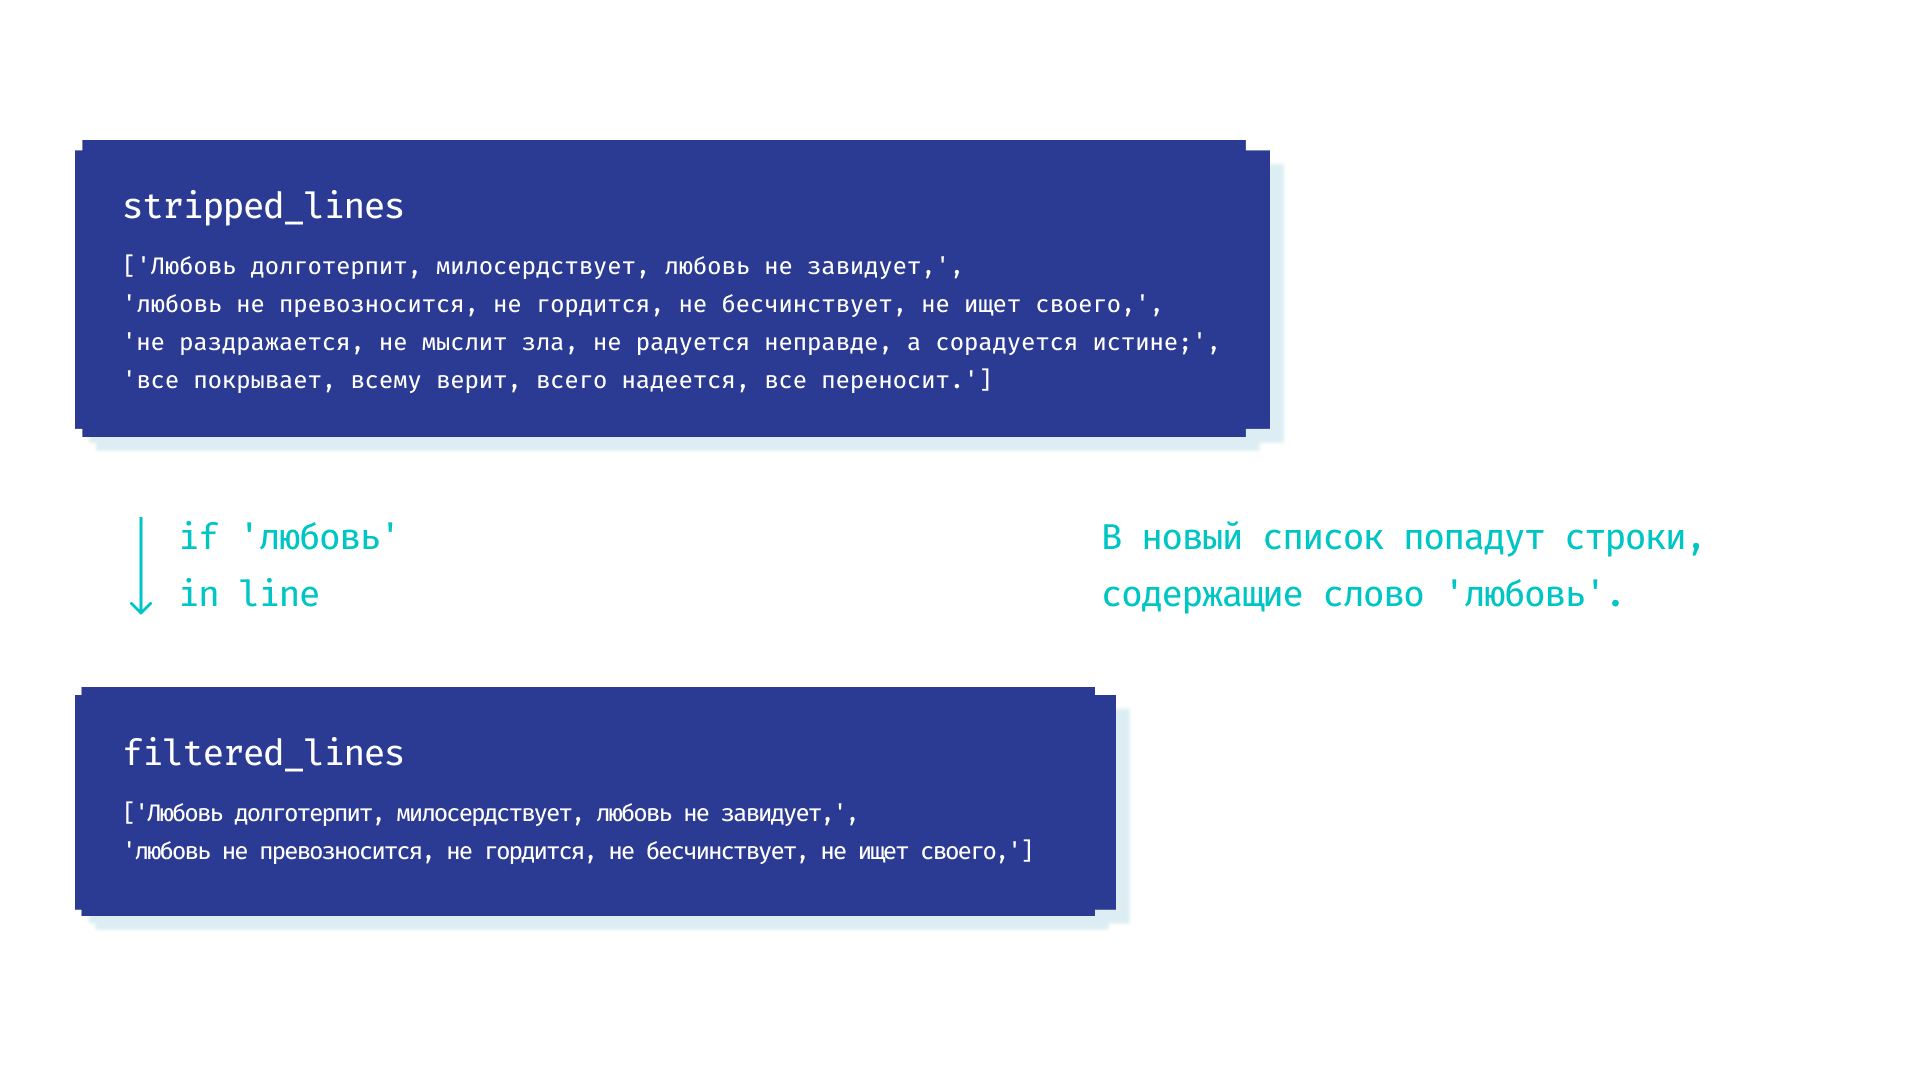

Можно одновременно фильтровать элементы списка и применять вычисление к каждому из отобранных.

In [ ]:
changed_and_filtered1 = [line.lower() for line in stripped_lines if 'не' in line] 
# в новый список выбираем только те строки, в которых есть слово "не", 
# и применяем ко всем строкам метод lower, который "превращает" все буквы в строчные
changed_and_filtered1

['любовь долготерпит, милосердствует, любовь не завидует,',
 'любовь не превозносится, не гордится, не бесчинствует, не ищет своего,',
 'не раздражается, не мыслит зла, не радуется неправде, а сорадуется истине;']

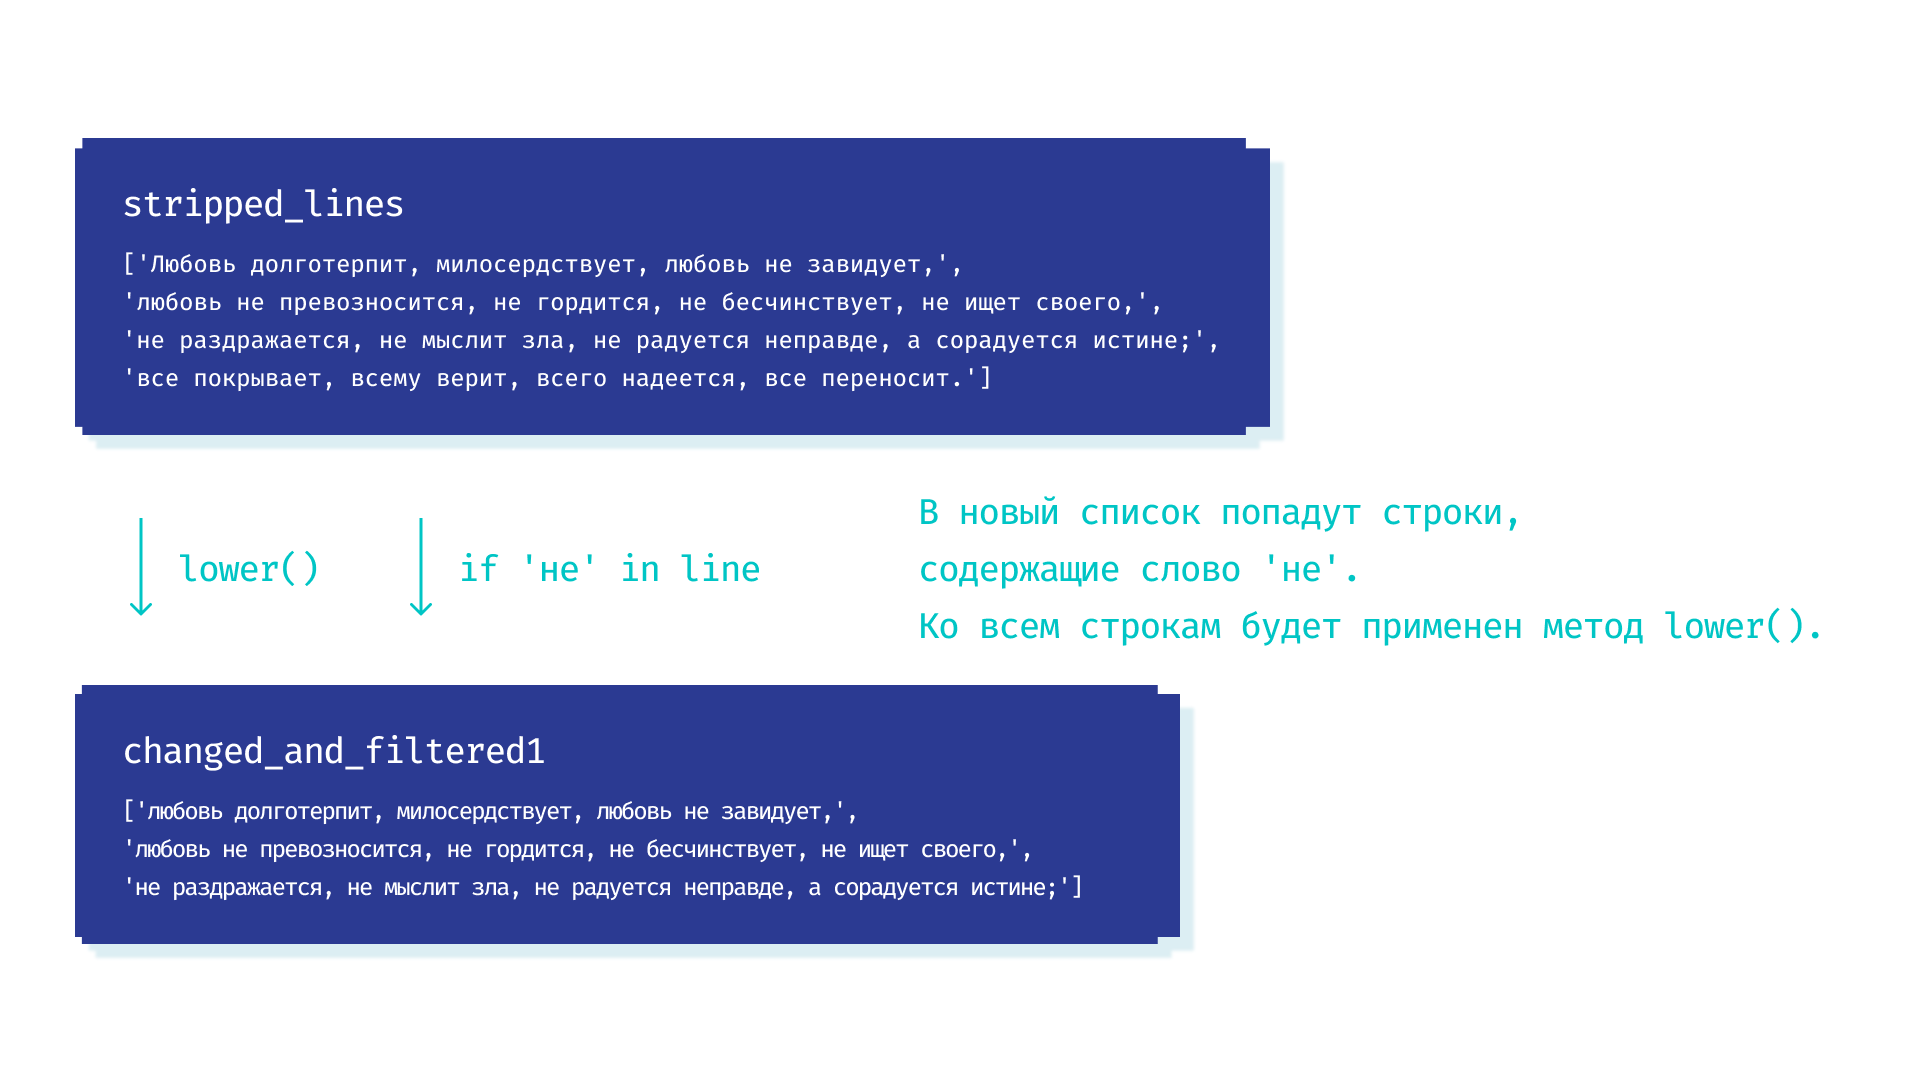

Напомним, что для последовательного поэлементного доступа *к любому итерируемуму объекту (включая список!)* можно использовать обычный цикл `for`:

In [ ]:
for line in changed_and_filtered1:
    print(line)

любовь долготерпит, милосердствует, любовь не завидует,
любовь не превозносится, не гордится, не бесчинствует, не ищет своего,
не раздражается, не мыслит зла, не радуется неправде, а сорадуется истине;


Хотя в данном случае можно добиться того же эффекта — вывести все обработанные строки — развернув их в параметры `print`:

In [ ]:
print(*changed_and_filtered1, sep='\n', end='\n')

любовь долготерпит, милосердствует, любовь не завидует,
любовь не превозносится, не гордится, не бесчинствует, не ищет своего,
не раздражается, не мыслит зла, не радуется неправде, а сорадуется истине;


## Функция map
Похожего эффекта поэлементной обработки списка (на деле и любого другого итерируемого объекта) можно добиться при помощи функций `map` и `filter`:

In [ ]:
filtered = filter(lambda s: 'не' in s, stripped_lines)
changed_and_filtered2 = map(lambda s: s.lower(), filtered)

for line in changed_and_filtered2:
    print(line)

любовь долготерпит, милосердствует, любовь не завидует,
любовь не превозносится, не гордится, не бесчинствует, не ищет своего,
не раздражается, не мыслит зла, не радуется неправде, а сорадуется истине;


Функция `filter` возвращает последовательность, содержащую не все элементы исходной последовательности (данной во 2-м параметре), а только те, которые прошли отбор её фильтром, который указывается в 1-м её параметре.
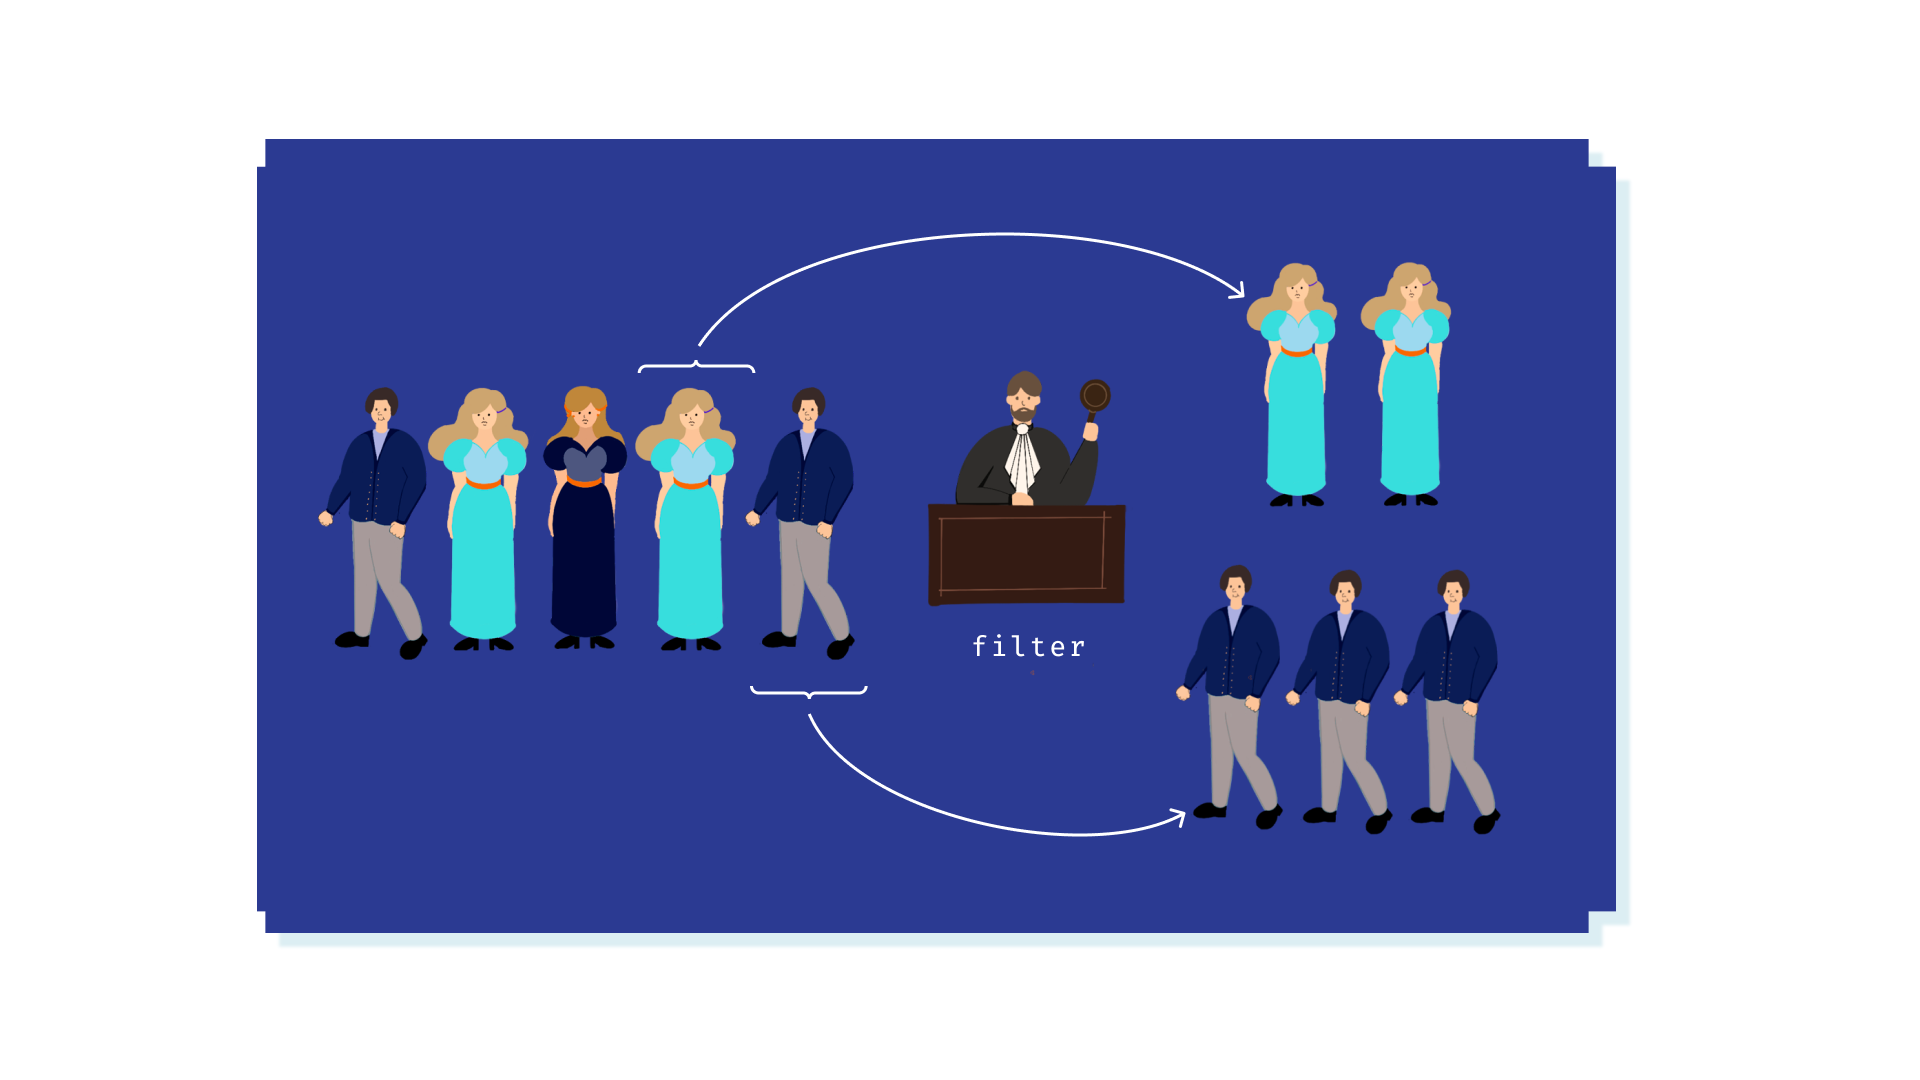

Функция `map` берёт свой первый параметр, и применяет его как "молоток" к каждому элементу данной во 2-м параметре последовательности.
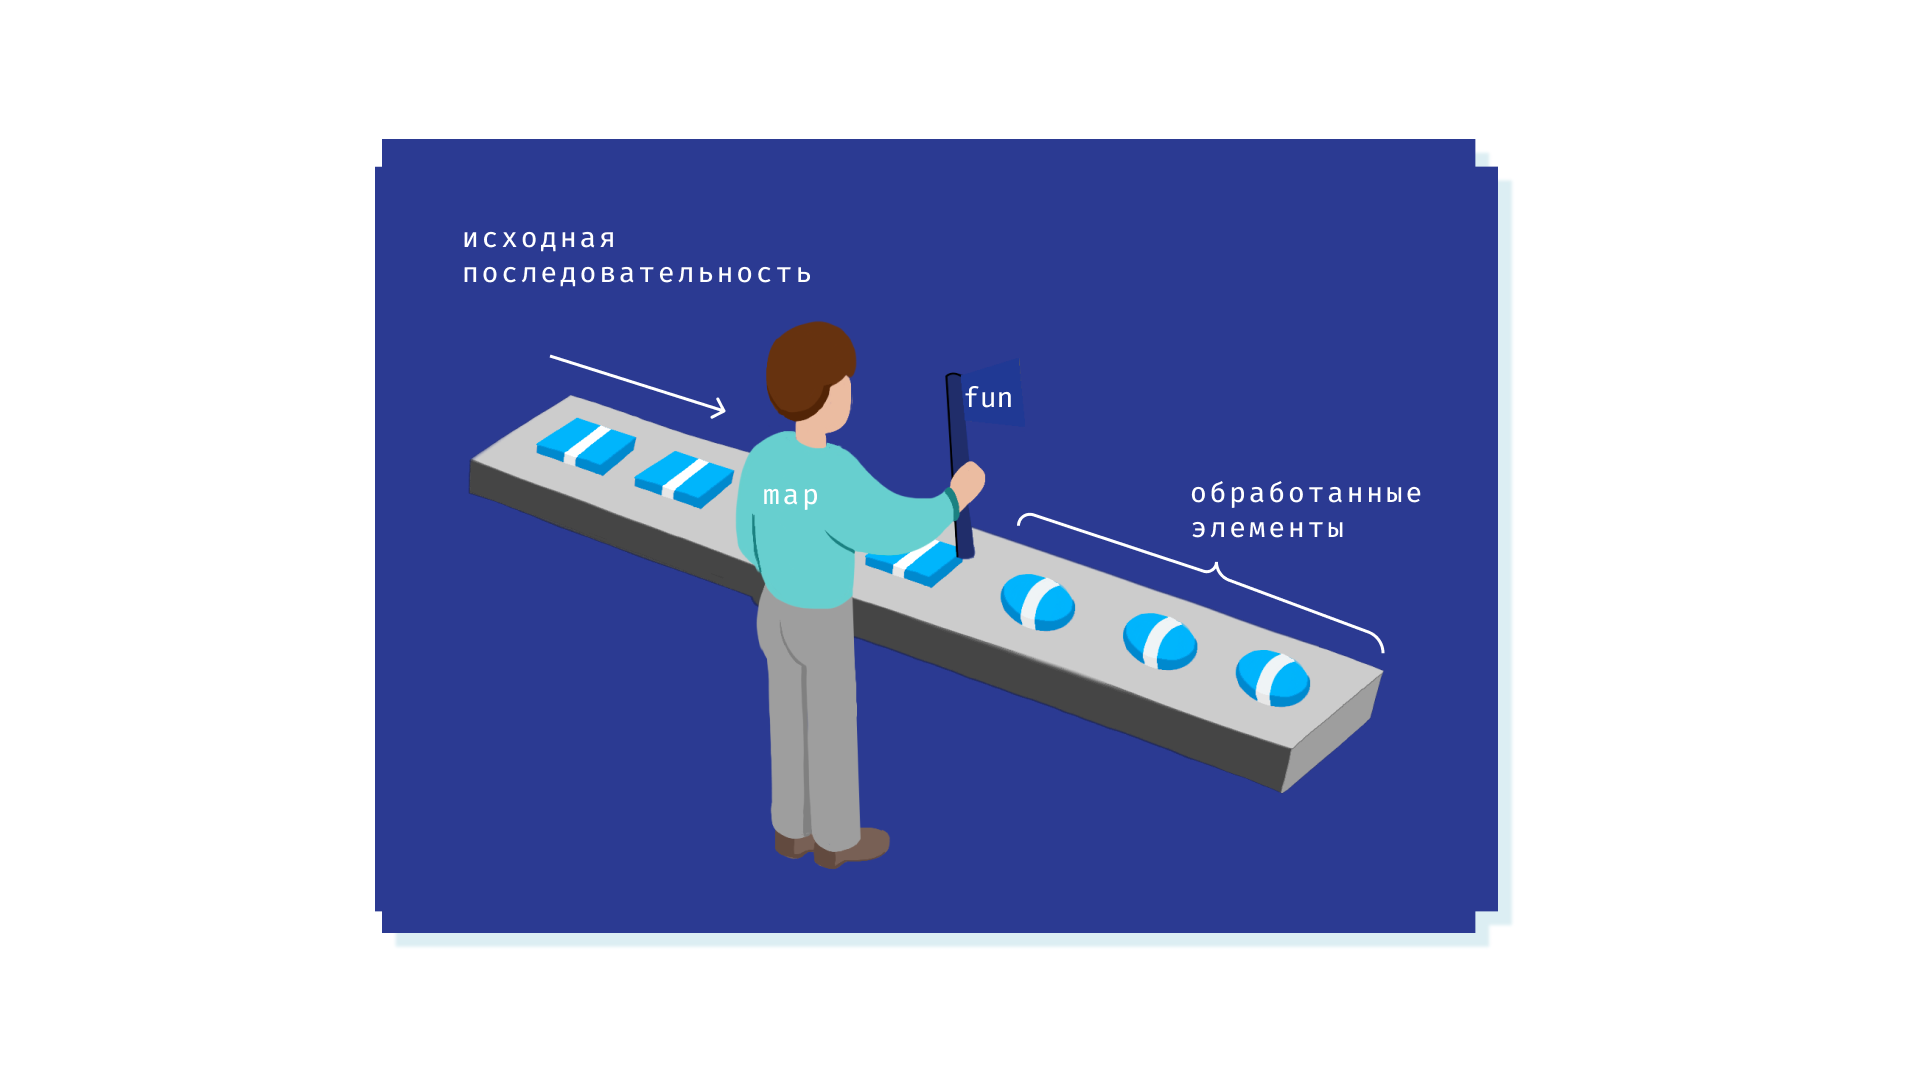
Несмотря на кажущееся сходство с list comprehensions, есть *существенные различия*. Функции `filter` и `map` не порождают список! Они вообще не запоминают всю последовательность целиком, а обрабатывают очередной элемент последовательности ровно тогда, когда он нужен. Пробежать забытую последовательность второй раз уже нельзя:

In [ ]:
a = "Moscow"
b = map(lambda char: chr(ord(char) + 1), a)
print('once:', *b)
print('again:', *b)

once: N p t d p x
again:


In [ ]:
a = "Moscow"
c = [chr(ord(char) + 1) for char in a]
print('once:', *c)
print('again:', *c)

once: N p t d p x
again: N p t d p x


Давайте посмотрим на типы `b` и `c`:

In [ ]:
print(type(b), type(c))

<class 'map'> <class 'list'>


Опа! Оказывается `b` — это вообще не список, а какой-то неизведанный итерируемый объект. Увы, эту "карту" мы уже исчерпали, больше она ничего не вернёт, так как обрабатывать ей больше нечего.

Польза от таких спец.объектов огромная — их можно выстраивать в последовательную обработку очень длинных последовательностей, и они будут работать в режиме *конвейера* Генри Форда. Или даже системы завода Тойота, где необходимый продукт выполняется только по запросу и никогда не про запас. Короче, это сохраняет ресурсы вашего компьютера.

### Функция как объект 1-го класса

Обратите внимание, что в случае с `map` и `filter` *алгоритм* передаётся внутрь другого *алгоритма* как обычный параметр!

Поскольку в Python алгоритмы называются функциями, то повторим: **функция передаётся в функцию как параметр**. То есть она передаётся туда внутрь, чтобы запускаться там столько раз, сколько захочет принявшая её функция.

По-науке это называется "функция как объект первого класса".

Давайте сделаем это своими руками, без стандартных функций:

In [ ]:
def triple_performer(function, x):
    print(function(x))
    print(function(x))
    print(function(x))

triple_performer(lambda x: x[:5], "Ничего на свете лучше нету...")
triple_performer(lambda x: x.upper(), "Ничего на свете лучше нету...")

Ничег
Ничег
Ничег
НИЧЕГО НА СВЕТЕ ЛУЧШЕ НЕТУ...
НИЧЕГО НА СВЕТЕ ЛУЧШЕ НЕТУ...
НИЧЕГО НА СВЕТЕ ЛУЧШЕ НЕТУ...


Функции с именами, описанные через `def` в данном случае ничем не отличаются от безымянных, созданных через `lambda`:

In [ ]:
def triple_performer(function, x):
    print(function(x))
    print(function(x))
    print(function(x))

def truncator(x):
    return x[:5]

def capitalizer(x):
    return x.upper()

triple_performer(truncator, "Ничего на свете лучше нету...")
triple_performer(capitalizer, "Ничего на свете лучше нету...")

Ничег
Ничег
Ничег
НИЧЕГО НА СВЕТЕ ЛУЧШЕ НЕТУ...
НИЧЕГО НА СВЕТЕ ЛУЧШЕ НЕТУ...
НИЧЕГО НА СВЕТЕ ЛУЧШЕ НЕТУ...


Здесь мы создали функции стандартным оператором `def`, который не только создаёт функцию (алгоритм), но и *присваивает ему имя*. Мы можем это сделать и вот так:

In [ ]:
f = lambda s: s.upper()
f("It seems to work...")

'IT SEEMS TO WORK...'

Однако часто нам не нужны функции с именами, а нужен только временный объект функции "здесь и сейчас", чтобы передать его внутрь какого-нибудь генератора вроде `map` или `filter`. Тогда синтаксическая конструкция со словом `lambda` будет удобна, а также не оставит "грязи" (лишнего имени) в пространстве имён.

## Функция zip
`zip` — молния-застёжка. Работает над итериремыми объектами одинаковой длины, "смыкая" их элементы в кортежи. Её очень удобно применять *вместе с распаковкой параметров* в заголовке цила `for`:

In [ ]:
a = "Алексей Руслан Тимур".split()
b = "Алёна Рита Тая".split()
for x, y in zip(a, b):
    print(x, '+', y, '= \u2665')

Алексей + Алёна = ♥
Руслан + Рита = ♥
Тимур + Тая = ♥


In [ ]:
for x in zip(a, b):
    print(x)

('Алексей', 'Алёна')
('Руслан', 'Рита')
('Тимур', 'Тая')


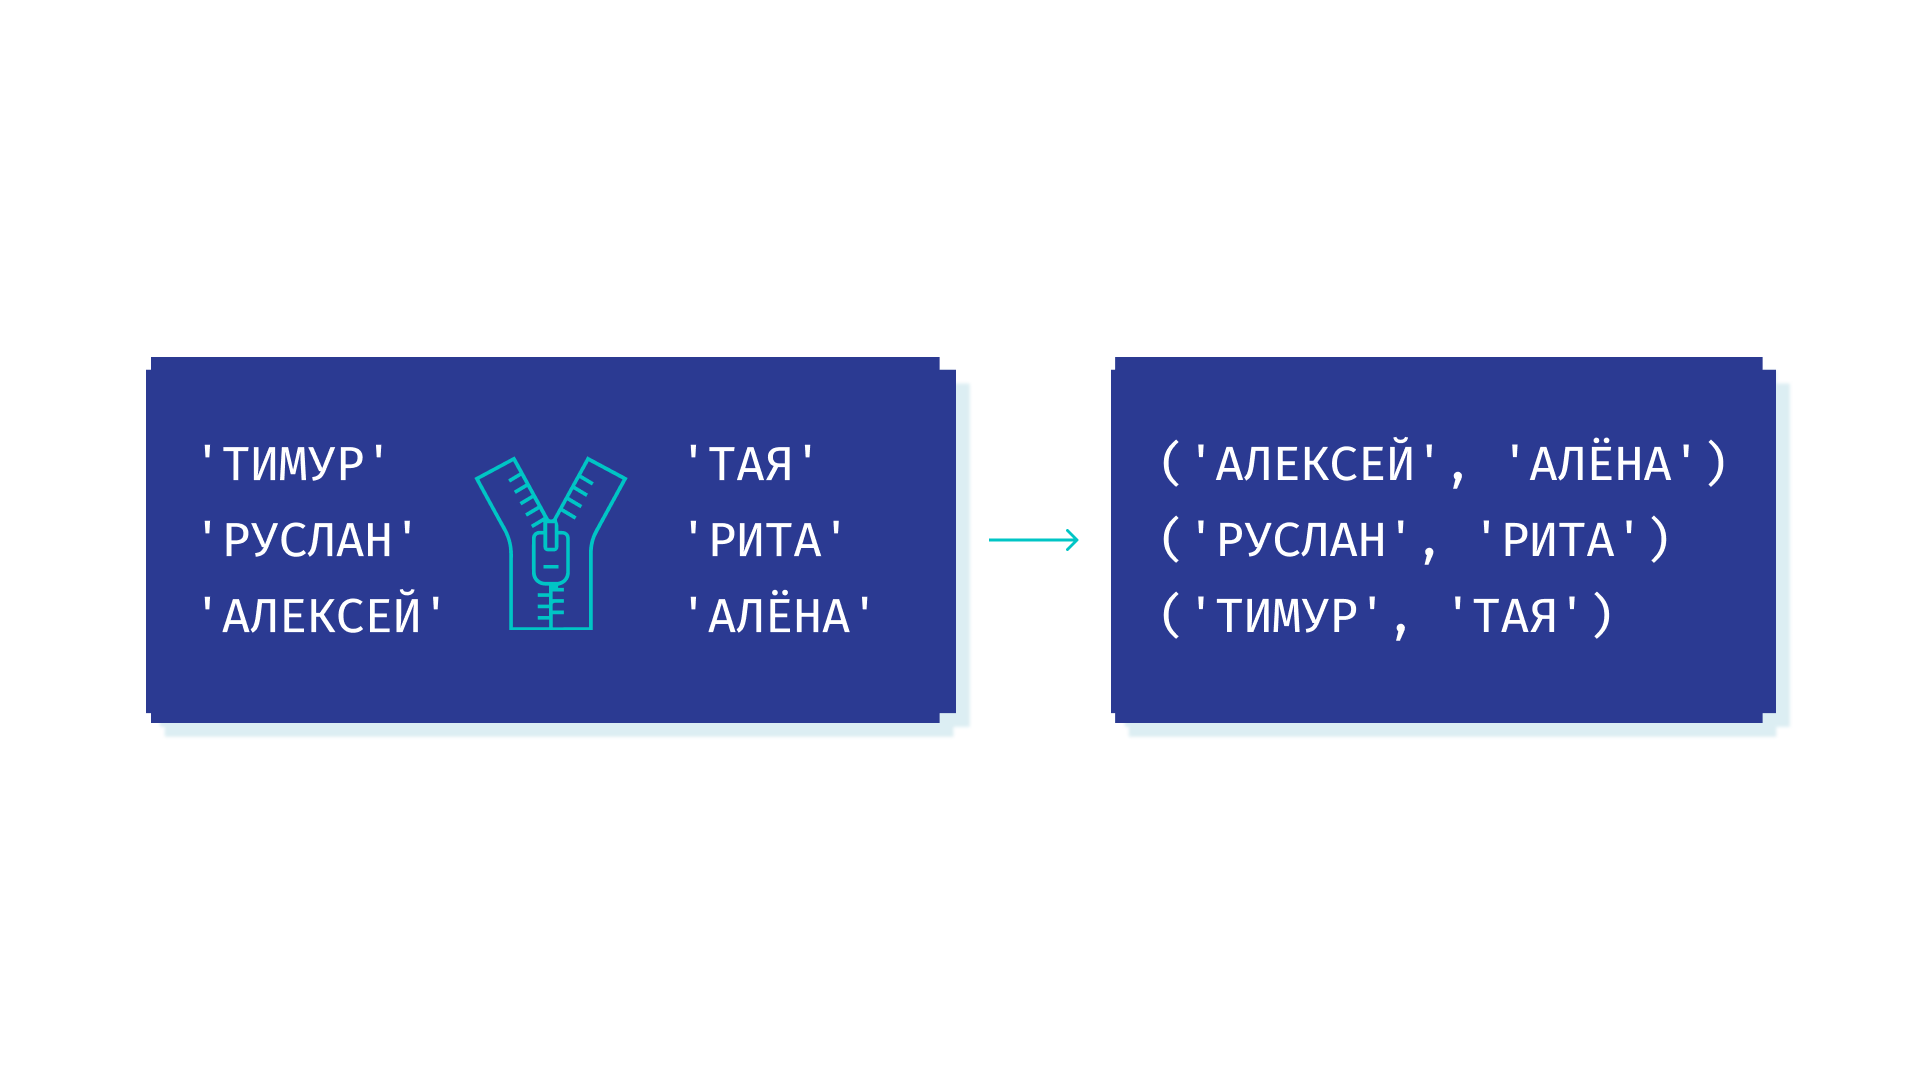

Из встроенных функций забавной также является `enumerate`:

In [ ]:
for number, student in enumerate(["Маша", "Вася", "Петя", "Рома", "Макар"]):
    print(number, student)

0 Маша
1 Вася
2 Петя
3 Рома
4 Макар


In [ ]:
print(*enumerate("Нумерация"))

(0, 'Н') (1, 'у') (2, 'м') (3, 'е') (4, 'р') (5, 'а') (6, 'ц') (7, 'и') (8, 'я')


Да, начинается счёт от нуля, но это можно исправить:

In [ ]:
print(*enumerate("Нумерация", 1))

(1, 'Н') (2, 'у') (3, 'м') (4, 'е') (5, 'р') (6, 'а') (7, 'ц') (8, 'и') (9, 'я')


# Библиотека itertools
Для продвинутой работы с итерируемыми объектами есть стандартная библиотека `itertools`. Чтобы её использовать, необходимо один раз в программе подключить её. Например, так:

In [ ]:
import itertools as it

## Кобинации, перестановки, декартово произведение.

In [ ]:
for x, y, z in it.permutations("ABC"):
    print(x, y, z, sep='', end='\t')

ABC	ACB	BAC	BCA	CAB	CBA	

In [ ]:
for x, y, z in it.permutations("ABCDE", 3):
    print(x, y, z, sep='', end='\t')

ABC	ABD	ABE	ACB	ACD	ACE	ADB	ADC	ADE	AEB	AEC	AED	BAC	BAD	BAE	BCA	BCD	BCE	BDA	BDC	BDE	BEA	BEC	BED	CAB	CAD	CAE	CBA	CBD	CBE	CDA	CDB	CDE	CEA	CEB	CED	DAB	DAC	DAE	DBA	DBC	DBE	DCA	DCB	DCE	DEA	DEB	DEC	EAB	EAC	EAD	EBA	EBC	EBD	ECA	ECB	ECD	EDA	EDB	EDC	

In [ ]:
for x, y in it.combinations("ABCDE", 2):
    print(x, y, sep='', end='\t')

AB	AC	AD	AE	BC	BD	BE	CD	CE	DE	

In [ ]:
for x, y in it.combinations_with_replacement("ABCDE", 2):
    print(x, y, sep='', end='\t')

AA	AB	AC	AD	AE	BB	BC	BD	BE	CC	CD	CE	DD	DE	EE	

In [ ]:
for n, s in it.product([1, 2, 3, 4], "ABC"):
    print(n, s)

1 A
1 B
1 C
2 A
2 B
2 C
3 A
3 B
3 C
4 A
4 B
4 C


## Цепочки. Повторение и зацикливание.
Если нужно две или больше последовательностей связать в единую последовательность, как бы "в цепочку", поможет `chain`:

In [ ]:
for a in it.chain("первое", "слово", "дороже", "второго"):
    print(a, end=' ')

п е р в о е с л о в о д о р о ж е в т о р о г о 

А теперь будьте осторожны! С этими функциями даже цикл `for` может быть зациклен! Если `repeat` не указать число повторений, это будет длиться бесконечно...

In [ ]:
for a in it.repeat("Повторим?", 7):
    print(a)

Повторим?
Повторим?
Повторим?
Повторим?
Повторим?
Повторим?
Повторим?


А `cycle` зацикливает последовательность навечно. Может быть не запускать это без знаков комментария?..

In [ ]:
## Может быть не запускать это?..
#for x in it.cycle("вечность"):
#    print(x)

## Срез последовательности islice
Ограничение последовательности по длине можно сделать `islice`. Он работает по принципу среза строки или списка.

`islice(iterable, start, stop, step)`:

In [ ]:
a = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
b = map(lambda x: x*10, a)
print(*it.islice(b, 1, 10, 2))

20 40 60 80 100


# Запись в файл

In [ ]:
f = open('filename.txt', 'w')
f.write("some text")
f.write("some text")
f.close()

При помощи `write` новые строки (символы `\n`) в файл автоматически не попадают, их нужно добавлять самому.

Но можно воспользоваться стандратной `print`:

In [ ]:
f = open('filename.txt', 'w')
print("some text", file=f)
print("some text", file=f)
f.close()

Сборка списка строк методом join, если у нас готов целый список строк для записи в файл:

In [ ]:
f = open('filename.txt', 'w')
lines = ["some", "text", "is", "here"]
f.write("\n".join(lines))
f.close()

Пока файл не закрыт `close`, на диске будет старое его состояние из-за отложенной записи. Не забывайте закрывать файлы!

In [ ]:
with open('filename.txt', 'w') as f:
    lines = ["some", "text", "is", "here"]
    f.write("\n".join(lines))

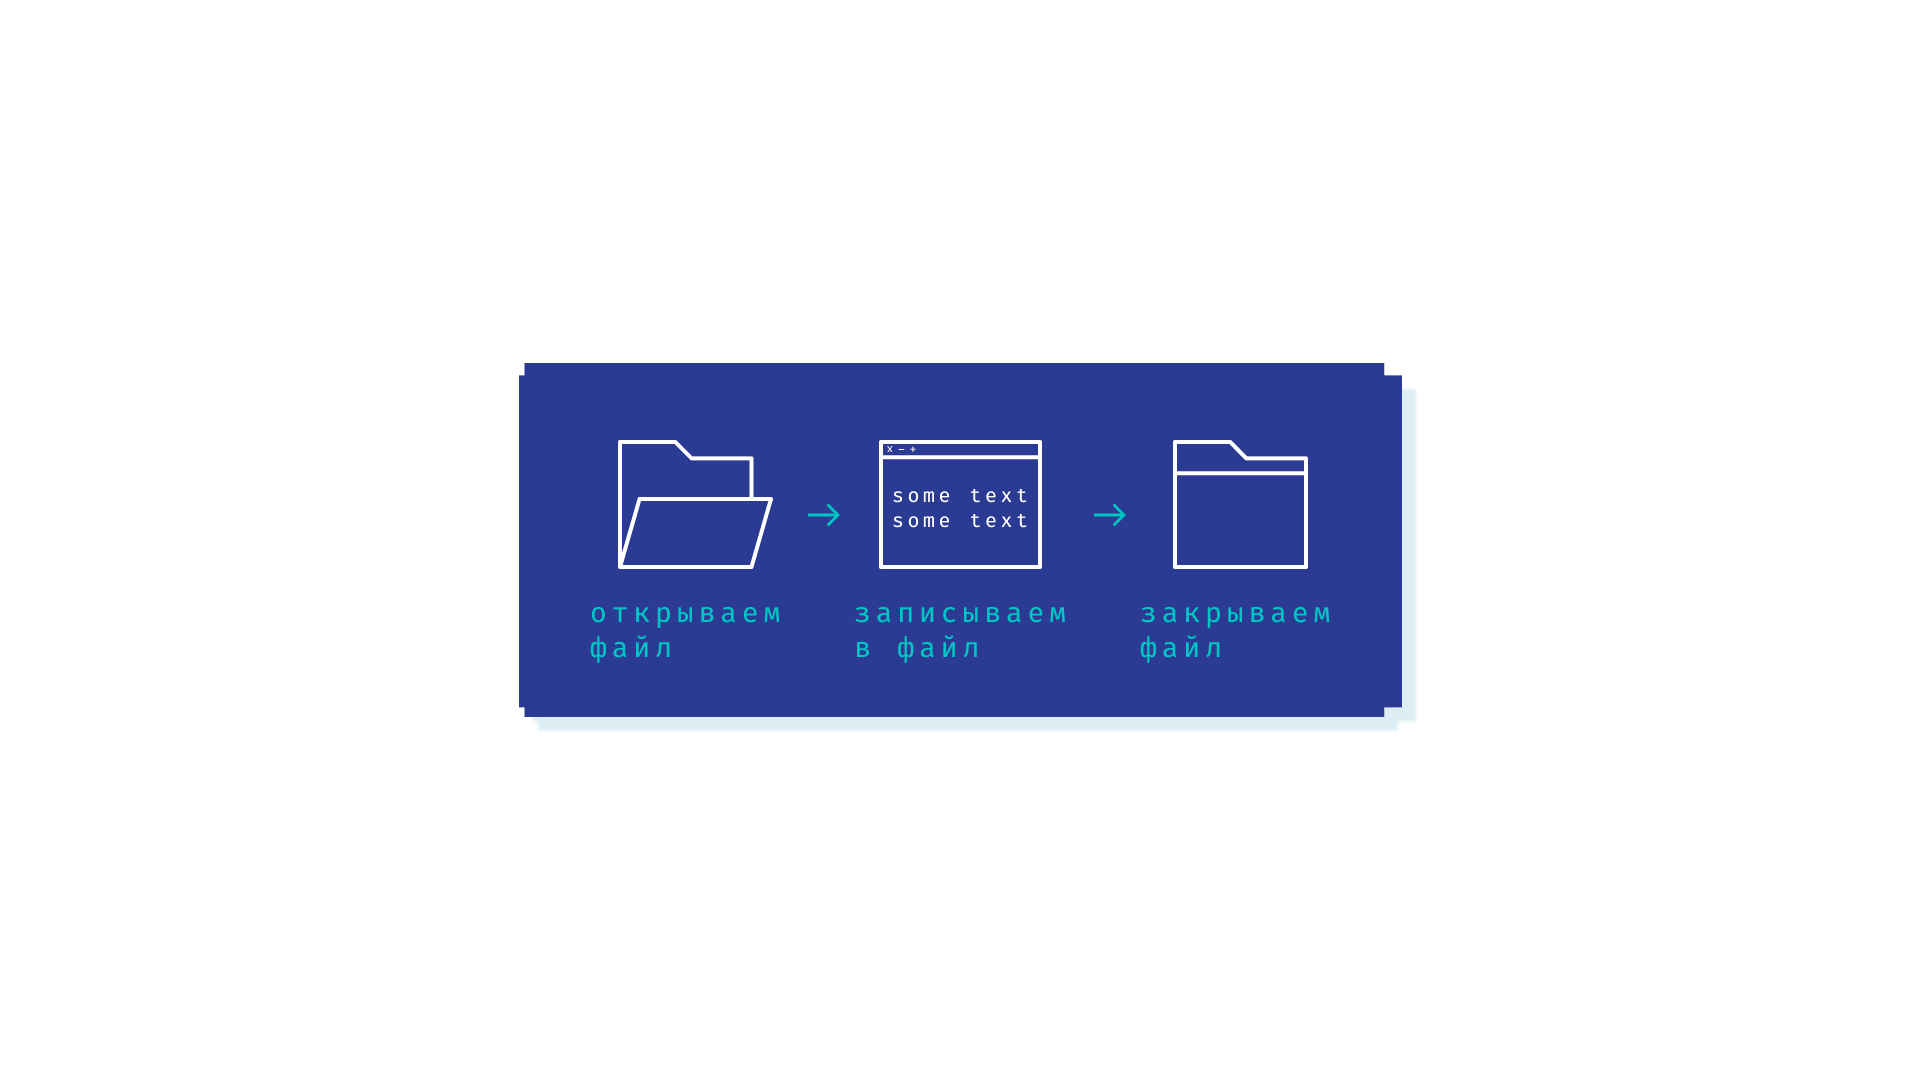